Exercício: Análise Exploratória de Dados

Objetivos: Exercitar os conceitos referente à análise exploratória de dados.

# a. Ler o dataset fakeTelegram.BR_2022.csv

In [1]:
import duckdb

conn = duckdb.connect()

telegram_data = conn.read_csv("../data/fakeTelegram.BR_2022.csv")

query = """
    SELECT * FROM telegram_data
"""

df = conn.execute(query).fetchdf()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [2]:
df.head()

date_message               id_member_anonymous  \
0 2022-10-05 06:25:04  1078cc958f0febe28f4d03207660715f   
1 2022-10-05 06:25:08                              None   
2 2022-10-05 06:26:28  92a2d8fd7144074f659d1d29dc3751da   
3 2022-10-05 06:27:28  d60aa38f62b4977426b70944af4aff72   
4 2022-10-05 06:27:44  cd6979b0b5265f08468fa1689b6300ce   

                 id_group_anonymous                                 media  \
0  12283e08a2eb5789201e105b34489ee7                                  None   
1  12283e08a2eb5789201e105b34489ee7                                  None   
2  9f2d7394334eb224c061c9740b5748fc                                  None   
3  c8f2de56550ed0bf85249608b7ead93d  94dca4cda503100ebfda7ce2bcc060eb.jpg   
4  e56ec342fc599ebb4ed89655eb6f03aa  5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg   

  media_type media_url  has_media  has_media_url  trava_zap  \
0       None      None      False          False      False   
1       None      None      False          False      False   
2       None      None      False          False      False   
3  image/jpg      None       True          False      False   
4  image/jpg      None       True          False      False   

                              text_content_anonymous  dataset_info_id  \
0  Então é Fato Renato o áudio que eu ouvi no wha...                5   
1  Saiu no YouTube do presidente a 8 horas atrás,...                5   
2  É isso, nossa parte já foi quase toda feita. N...                5   
3           GENTE ACHEI ELES EM UMA SEITA MAÇONÁRICA                5   
4                                               None                5   

                 date_system  score_sentiment  score_misinformation  \
0 2022-10-05 06:25:28.863641           0.0000                   NaN   
1 2022-10-05 06:25:28.926311           0.0644                   NaN   
2 2022-10-05 06:26:29.361949          -0.3551              0.157242   
3 2022-10-05 06:27:29.935624           0.0000                   NaN   
4 2022-10-05 06:28:29.316325              NaN                   NaN   

   id_message message_type messenger media_name  \
0       16385        Texto  telegram       None   
1       16386        Texto  telegram       None   
2       16366        Texto  telegram       None   
3       19281       Imagem  telegram       None   
4      507185       Imagem  telegram       None   

                          media_md5  
0                              None  
1                              None  
2                              None  
3  94dca4cda503100ebfda7ce2bcc060eb  
4  5ad5c8bbe9da93a37fecf3e5aa5b0637

# b. Remova os trava-zaps.

In [3]:
df.shape

(557586, 19)

In [4]:
df = conn.execute(f"""
    SELECT * 
    FROM telegram_data
    WHERE trava_zap IS NOT TRUE
""").fetch_df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [5]:
df.shape

(557570, 19)

# c. Remover as linhas repetidas (duplicadas).

In [6]:
df_ = conn.execute("SELECT DISTINCT * FROM df").fetch_df()

In [7]:
df_.shape

(557570, 19)

# d. Remover textos com menos de 5 palavras.

In [8]:
query = """
SELECT *
FROM df_
WHERE array_length(string_split(text_content_anonymous, ' ')) >= 5
"""

df = conn.execute(query).fetch_df()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [9]:
df.shape

(336944, 19)

# e. Para cada atributo numérico apresente:

## 1. Medidas de Tendência Central

In [10]:
df.describe()

date_message  dataset_info_id  \
count                      336944         336944.0   
mean   2022-10-20 18:57:16.731545              5.0   
min           2022-09-29 00:00:04              5.0   
25%    2022-10-08 03:39:42.250000              5.0   
50%           2022-10-21 20:05:24              5.0   
75%    2022-11-01 02:43:39.750000              5.0   
max           2022-11-11 12:09:48              5.0   
std                           NaN              0.0   

                      date_system  score_sentiment  score_misinformation  \
count                      336944    336896.000000         167186.000000   
mean   2022-10-20 23:14:19.841068         0.022032              0.312288   
min    2022-10-03 04:04:31.751964        -1.000000              0.000003   
25%    2022-10-08 03:40:55.067171        -0.392750              0.078453   
50%    2022-10-21 20:05:26.984055         0.000000              0.197672   
75%    2022-11-01 02:43:42.638505         0.510600              0.490547   
max    2022-11-16 14:49:40.064006         0.999200              1.000000   
std                           NaN         0.531292              0.293731   

         id_message  
count  3.369440e+05  
mean   4.220831e+05  
min    2.000000e+00  
25%    1.982400e+04  
50%    8.482350e+04  
75%    9.733392e+05  
max    1.516436e+06  
std    4.845176e+05

## 2. Medidas de Variabilidade

In [11]:
for col in df.select_dtypes(include='number').columns:
    print(f"{col} - variância: {df[col].var():.2f}, desvio padrão: {df[col].std():.2f}, amplitude: {df[col].max() - df[col].min():.2f}")


dataset_info_id - variância: 0.00, desvio padrão: 0.00, amplitude: 0.00
score_sentiment - variância: 0.28, desvio padrão: 0.53, amplitude: 2.00
score_misinformation - variância: 0.09, desvio padrão: 0.29, amplitude: 1.00
id_message - variância: 234757284895.97, desvio padrão: 484517.58, amplitude: 1516434.00


## 3. Tabela de Frequência e Histograma

Tabela de frequência - dataset_info_id
dataset_info_id
(4.995, 4.996]         0
(4.996, 4.997]         0
(4.997, 4.998]         0
(4.998, 4.999]         0
(4.999, 5.0]      336944
(5.0, 5.001]           0
(5.001, 5.002]         0
(5.002, 5.003]         0
(5.003, 5.004]         0
(5.004, 5.005]         0
Name: count, dtype: int64


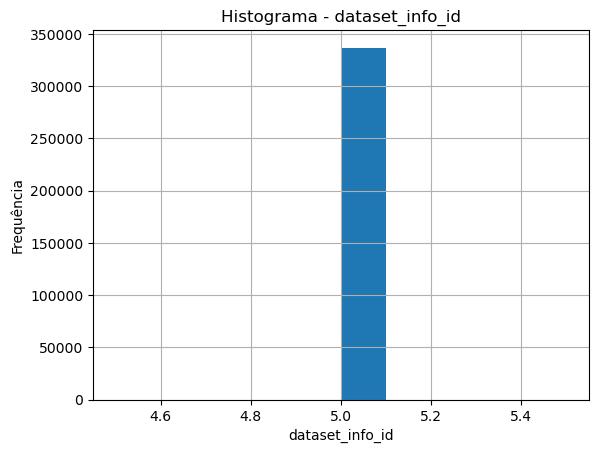

Tabela de frequência - score_sentiment
score_sentiment
(-1.002, -0.8]     25619
(-0.8, -0.6]       28015
(-0.6, -0.4]       30316
(-0.4, -0.2]       25150
(-0.2, -0.0004]    18427
(-0.0004, 0.2]     87933
(0.2, 0.399]       22792
(0.399, 0.599]     42711
(0.599, 0.799]     26973
(0.799, 0.999]     28960
Name: count, dtype: int64


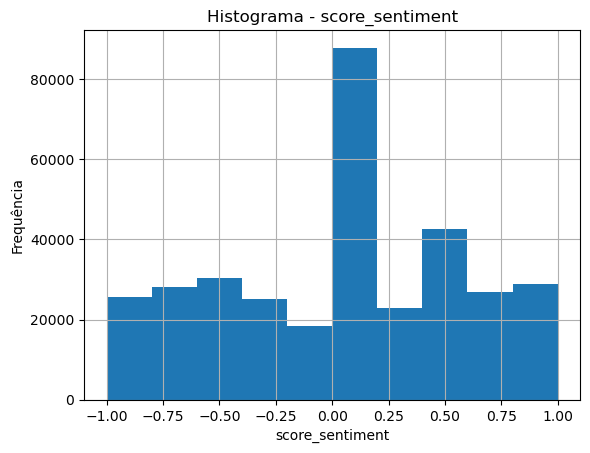

Tabela de frequência - score_misinformation
score_misinformation
(-0.000997, 0.1]    51140
(0.1, 0.2]          33040
(0.2, 0.3]          19169
(0.3, 0.4]          12834
(0.4, 0.5]          10083
(0.5, 0.6]           8510
(0.6, 0.7]           7656
(0.7, 0.8]           6808
(0.8, 0.9]           6371
(0.9, 1.0]          11575
Name: count, dtype: int64


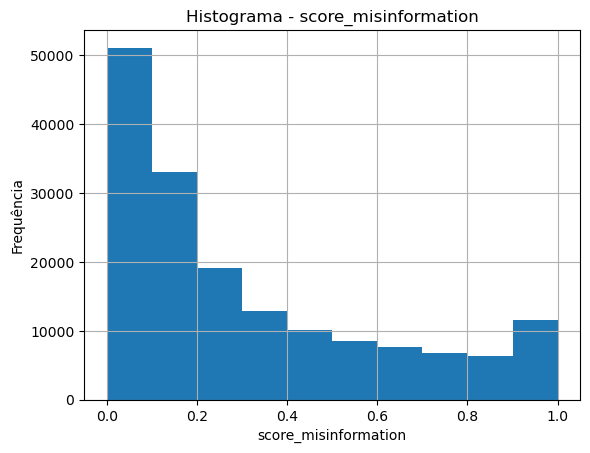

Tabela de frequência - id_message
id_message
(-1514.434, 151645.4]     177576
(151645.4, 303288.8]       18792
(303288.8, 454932.2]        9145
(454932.2, 606575.6]       22352
(606575.6, 758219.0]           0
(758219.0, 909862.4]        9215
(909862.4, 1061505.8]      39392
(1061505.8, 1213149.2]     39913
(1213149.2, 1364792.6]     18471
(1364792.6, 1516436.0]      2088
Name: count, dtype: int64


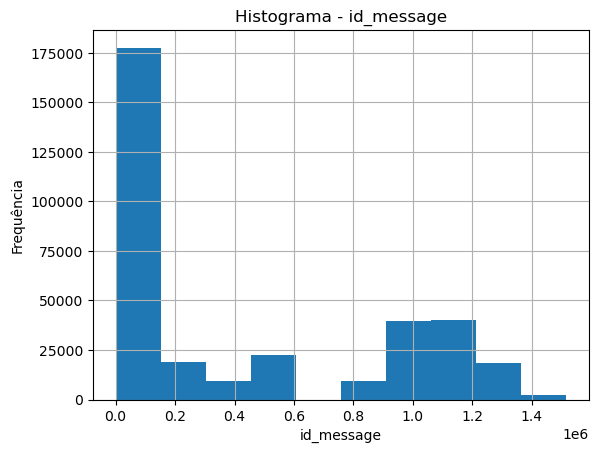

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

for col in df.select_dtypes(include='number').columns:
    print(f"Tabela de frequência - {col}")
    print(pd.cut(df[col], bins=10).value_counts().sort_index())
    
    df[col].hist(bins=10)
    plt.title(f"Histograma - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()


## 4. Boxplot

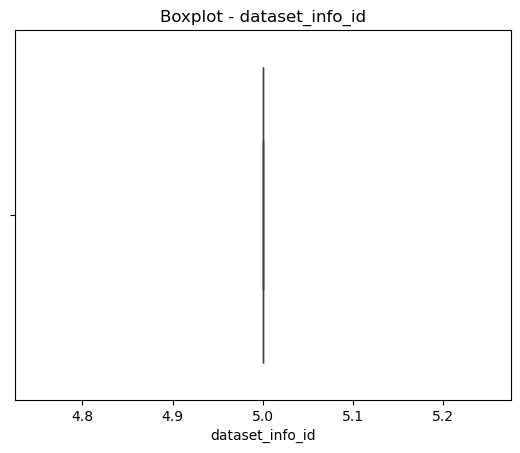

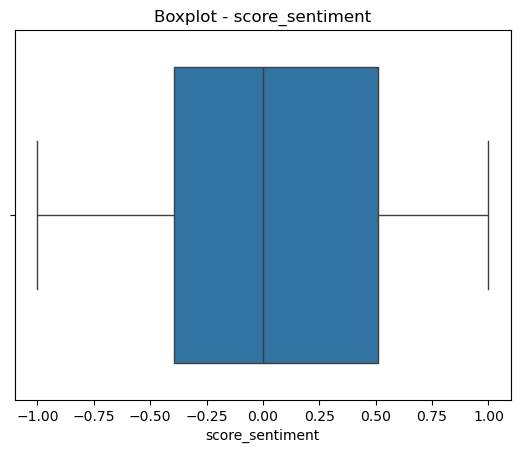

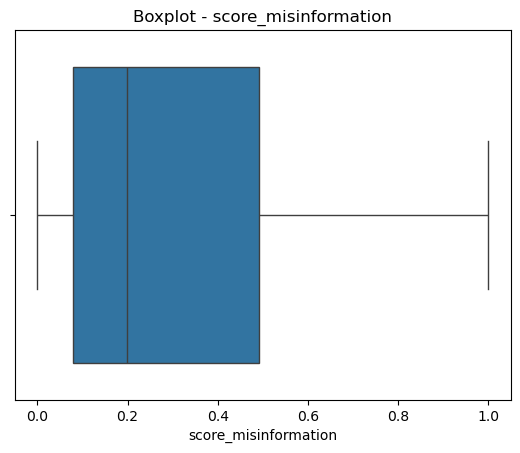

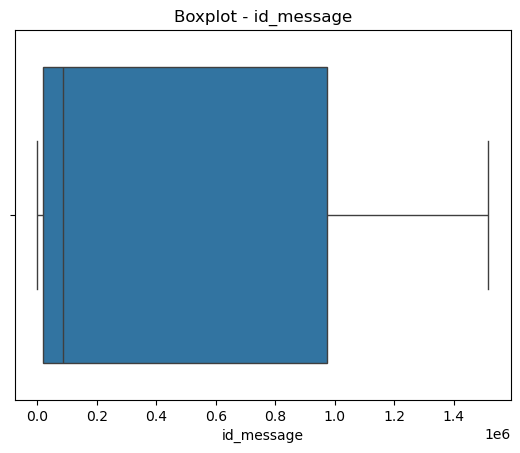

In [13]:
import seaborn as sns

for col in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot - {col}")
    plt.show()


## 5. QQ-Plot

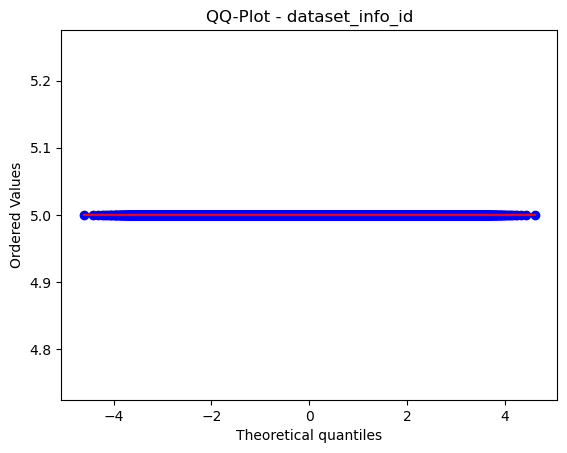

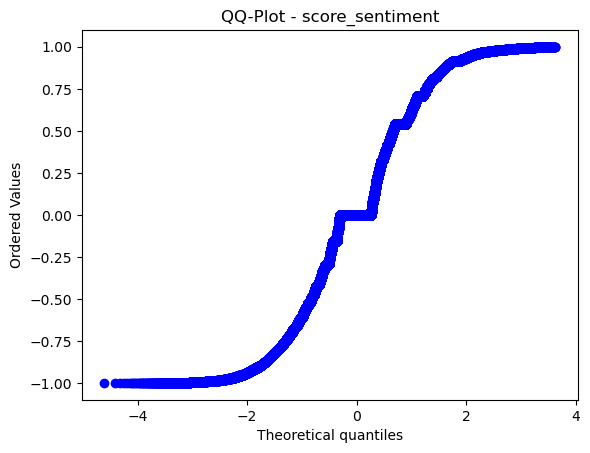

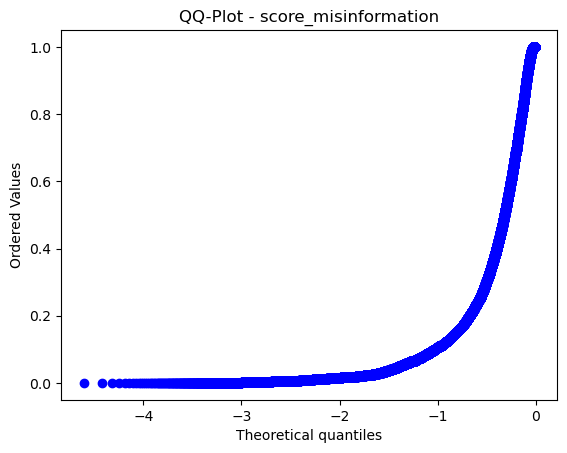

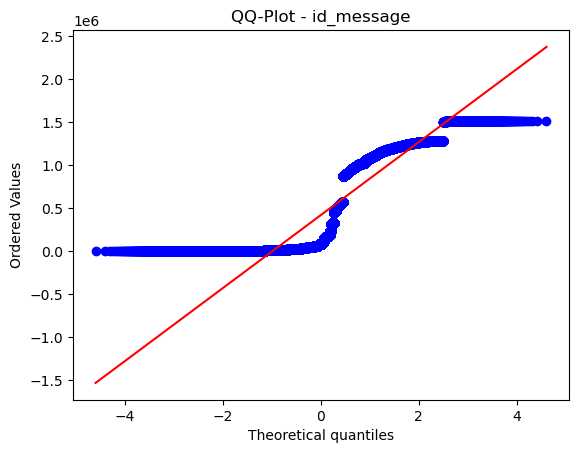

In [14]:
import scipy.stats as stats

for col in df.select_dtypes(include='number').columns:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"QQ-Plot - {col}")
    plt.show()

## 6. Teste de Normalidade

In [15]:
from scipy.stats import shapiro

for col in df.select_dtypes(include='number').columns:
    stat, p = shapiro(df[col].dropna())
    print(f"{col} - estatística: {stat:.4f}, p-valor: {p:.4f} -> {'Normal' if p > 0.05 else 'Não normal'}")


dataset_info_id - estatística: 1.0000, p-valor: 1.0000 -> Normal
score_sentiment - estatística: 0.9622, p-valor: 0.0000 -> Não normal
score_misinformation - estatística: 0.8555, p-valor: 0.0000 -> Não normal
id_message - estatística: 0.7676, p-valor: 0.0000 -> Não normal


c:\Users\pedro.santiago\AppData\Local\miniforge3\envs\cd\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\pedro.santiago\AppData\Local\miniforge3\envs\cd\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 336944.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\pedro.santiago\AppData\Local\miniforge3\envs\cd\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 336896.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\pedro.santiago\AppData\Local\miniforge3\envs\cd\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 167186.
  res = 

## 7. Best Fit Distribution (usando diferentes métodos)

c:\Users\pedro.santiago\AppData\Local\miniforge3\envs\cd\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2046: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\Users\pedro.santiago\AppData\Local\miniforge3\envs\cd\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)



===> dataset_info_id


c:\Users\pedro.santiago\AppData\Local\miniforge3\envs\cd\Lib\site-packages\scipy\stats\_continuous_distns.py:6921: RuntimeWarning: invalid value encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\pedro.santiago\AppData\Local\miniforge3\envs\cd\Lib\site-packages\scipy\stats\_distn_infrastructure.py:409: RuntimeWarning: invalid value encountered in scalar divide
  return m3 / np.power(m2, 1.5)
c:\Users\pedro.santiago\AppData\Local\miniforge3\envs\cd\Lib\site-packages\scipy\stats\_distn_infrastructure.py:418: RuntimeWarning: invalid value encountered in scalar divide
  return m4 / m2**2 - 3
c:\Users\pedro.santiago\AppData\Local\miniforge3\envs\cd\Lib\site-packages\scipy\stats\_continuous_distns.py:800: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


Melhor distribuição: lognorm
Parâmetros: (np.float64(1.3720650559557304), np.float64(4.999999999999999), np.float64(1.021189604811536e-15))


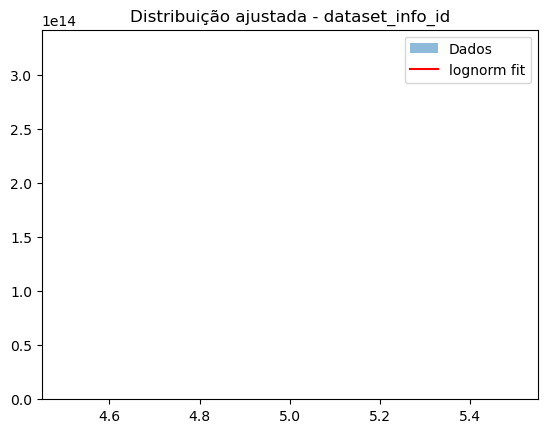


===> score_sentiment


c:\Users\pedro.santiago\AppData\Local\miniforge3\envs\cd\Lib\site-packages\scipy\stats\_continuous_distns.py:6912: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


Melhor distribuição: beta
Parâmetros: (np.float64(1.2183322236358451), np.float64(1.1737071688032144), np.float64(-1.000957491027966), np.float64(2.000188285229706))


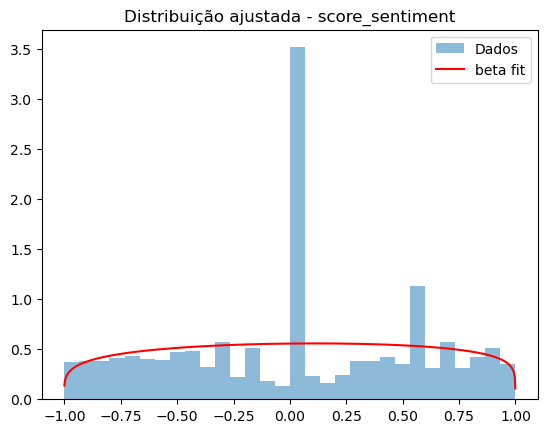


===> score_misinformation


c:\Users\pedro.santiago\AppData\Local\miniforge3\envs\cd\Lib\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Melhor distribuição: gamma
Parâmetros: (np.float64(0.9557224446286954), np.float64(3.2731487152999994e-06), np.float64(0.3266750125887904))


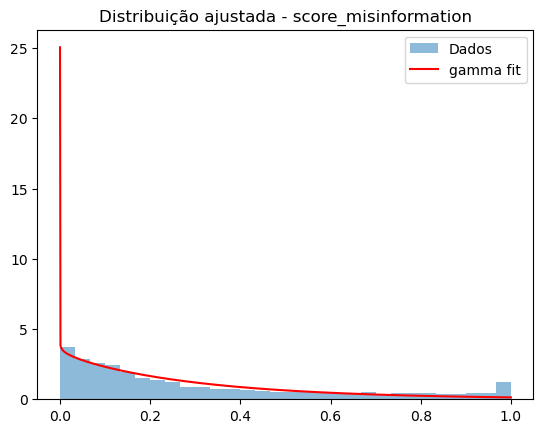


===> id_message
Melhor distribuição: lognorm
Parâmetros: (np.float64(2.157673703862765), 1.0450990611040811, np.float64(99947.83482897333))


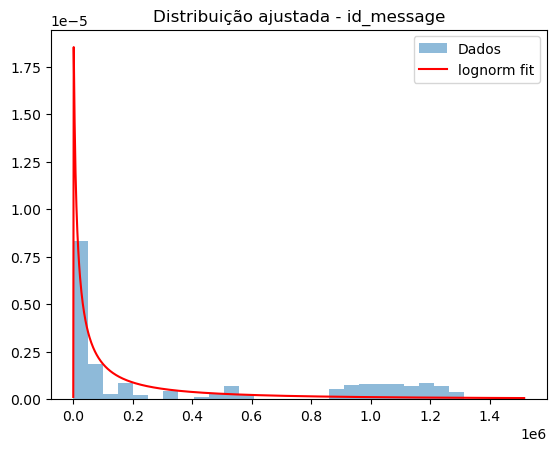

In [16]:
import numpy as np
import scipy.stats as st

DISTRIBUTIONS = [
    st.norm, st.expon, st.lognorm, st.gamma, st.beta, st.uniform
]

def best_fit_distribution(data, bins=200):
    data = data.dropna()
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    best_distribution = None
    best_params = None
    best_stat = np.inf
    best_name = ""
    
    for distribution in DISTRIBUTIONS:
        try:
            params = distribution.fit(data)

            pdf = distribution.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
            sse = np.sum((y - pdf) ** 2)

            stat, p = st.kstest(data, distribution.name, args=params)

            if sse < best_stat:
                best_distribution = distribution
                best_params = params
                best_stat = sse
                best_name = distribution.name
        except Exception:
            continue

    return best_name, best_params

for col in df.select_dtypes(include='number').columns:
    print(f"\n===> {col}")
    dist_name, params = best_fit_distribution(df[col])
    print(f"Melhor distribuição: {dist_name}")
    print(f"Parâmetros: {params}")
    
    x = np.linspace(df[col].min(), df[col].max(), 1000)
    pdf = getattr(st, dist_name).pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
    
    plt.hist(df[col], bins=30, density=True, alpha=0.5, label='Dados')
    plt.plot(x, pdf, 'r-', label=f'{dist_name} fit')
    plt.title(f'Distribuição ajustada - {col}')
    plt.legend()
    plt.show()


# f. Para cada par de atributos numéricos apresente:

## 1. O Coeficiente de Correlação apropriado

In [17]:
import itertools
from scipy.stats import pearsonr, spearmanr, kendalltau

num_cols = df.select_dtypes(include='number').columns

for col1, col2 in itertools.combinations(num_cols, 2):
    x = df[col1].dropna()
    y = df[col2].dropna()
    x, y = x.align(y, join='inner')
    
    p_corr, _ = pearsonr(x, y)
    s_corr, _ = spearmanr(x, y)
    k_corr, _ = kendalltau(x, y)
    
    print(f"\n{col1} vs {col2}")
    print(f"  Pearson:  {p_corr:.3f}")
    print(f"  Spearman: {s_corr:.3f}")
    print(f"  Kendall:  {k_corr:.3f}")


C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\2141317916.py:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  p_corr, _ = pearsonr(x, y)
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\2141317916.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  s_corr, _ = spearmanr(x, y)
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\2141317916.py:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  p_corr, _ = pearsonr(x, y)
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\2141317916.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  s_corr, _ = spearmanr(x, y)



dataset_info_id vs score_sentiment
  Pearson:  nan
  Spearman: nan
  Kendall:  nan

dataset_info_id vs score_misinformation
  Pearson:  nan
  Spearman: nan
  Kendall:  nan

dataset_info_id vs id_message
  Pearson:  nan
  Spearman: nan
  Kendall:  nan

score_sentiment vs score_misinformation
  Pearson:  -0.356
  Spearman: -0.389
  Kendall:  -0.275

score_sentiment vs id_message
  Pearson:  -0.109
  Spearman: -0.159
  Kendall:  -0.108

score_misinformation vs id_message
  Pearson:  0.173
  Spearman: 0.245
  Kendall:  0.163


## 2. Um Gráfico de Dispersão

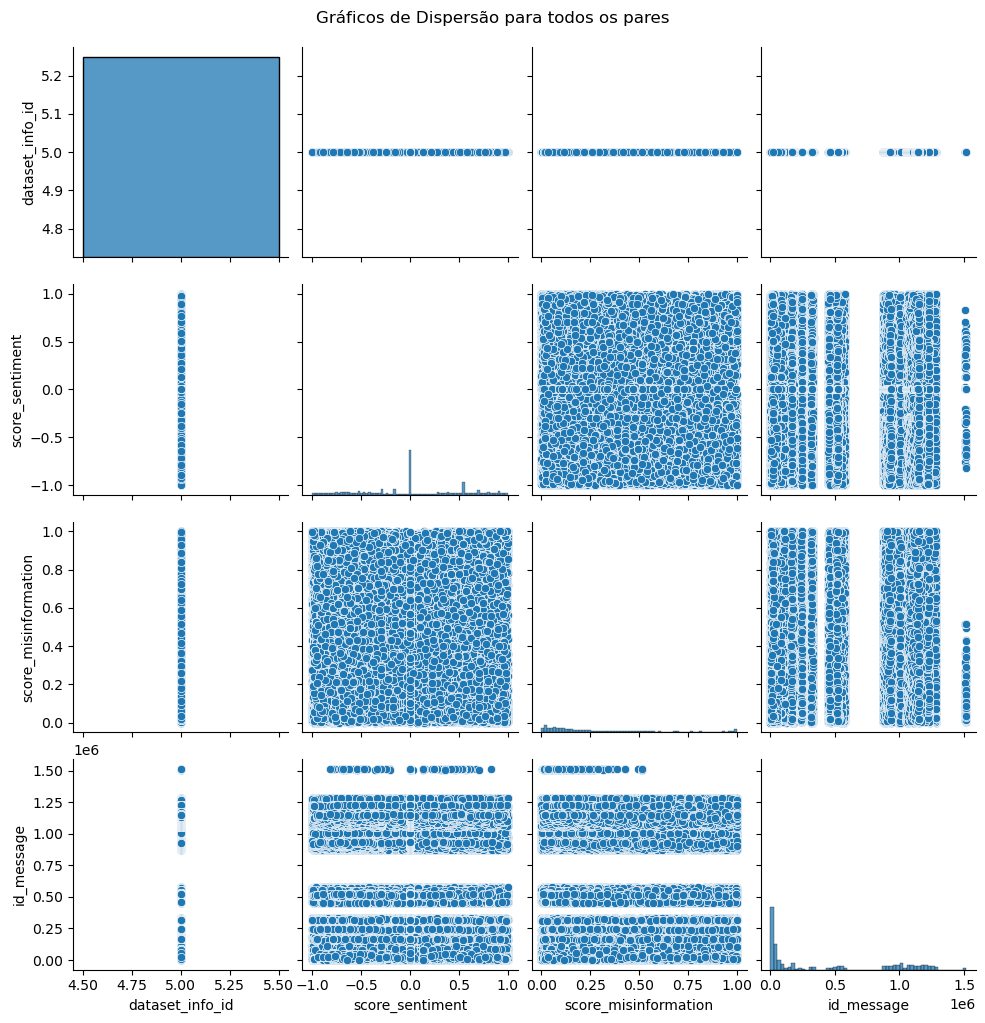

In [18]:
sns.pairplot(df[num_cols])
plt.suptitle("Gráficos de Dispersão para todos os pares", y=1.02)
plt.show()

# g. Para cada par de atributos categóricos apresente:
## 1. O resultado do método V de Cramer

In [26]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


max_unique_values = 50000 # memória estoura se não limitar
categorical_cols = [
    col for col in df.select_dtypes(include=['object', 'category']).columns
    if df[col].nunique() <= max_unique_values
]

cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            v = cramers_v(df[col1], df[col2])
            cramers_v_matrix.loc[col1, col2] = round(v, 3)

print(cramers_v_matrix)



C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\3222494531.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\3222494531.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\3222494531.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\3222494531.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\3222494531.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\pedro.santiago\AppData\Local\Temp\ip

                    id_member_anonymous id_group_anonymous media_type  \
id_member_anonymous                 1.0              0.812      0.367   
id_group_anonymous                0.812                1.0      0.171   
media_type                        0.367              0.171        1.0   
media_url                          0.57                0.5      0.373   
message_type                      0.603              0.322      0.919   
messenger                           NaN                NaN        NaN   
media_name                        0.668              0.385      0.741   

                    media_url message_type messenger media_name  
id_member_anonymous      0.57        0.603       NaN      0.668  
id_group_anonymous        0.5        0.322       NaN      0.385  
media_type              0.373        0.919       NaN      0.741  
media_url                 1.0        0.638       NaN      0.792  
message_type            0.638          1.0       NaN       0.74  
messenger          

C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\3222494531.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


# h. Crie uma visualização (gráfico) para apresentar:
1. As quantidades de grupos, usuários e mensagens;

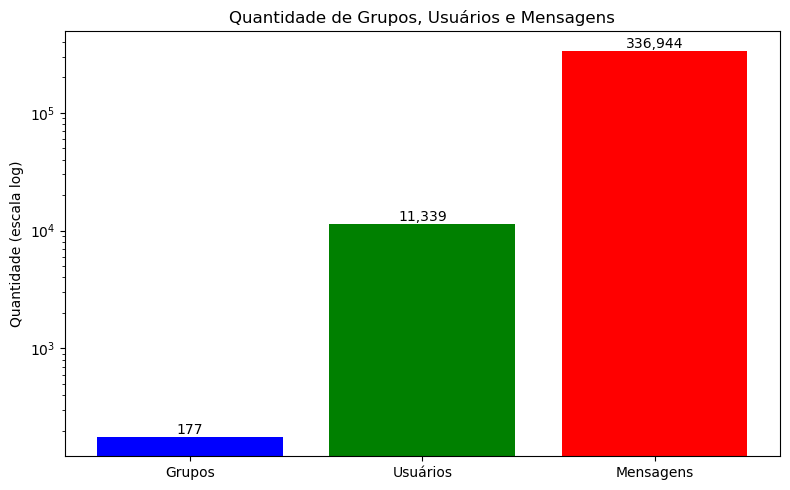

In [33]:
n_grupos = df['id_group_anonymous'].nunique()
n_usuarios = df['id_member_anonymous'].nunique()
n_mensagens = len(df)

labels = ['Grupos', 'Usuários', 'Mensagens']
counts = [n_grupos, n_usuarios, n_mensagens]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, counts, color=['blue', 'green', 'red'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', 
             ha='center', va='bottom', fontsize=10)

plt.yscale('log')  # escala logarítmica
plt.ylabel('Quantidade (escala log)')
plt.title('Quantidade de Grupos, Usuários e Mensagens')
plt.tight_layout()
plt.show()


## 2. A quantidade de mensagens que possuem apenas texto X mídia;

In [38]:
print(df.columns)

Index(['date_message', 'id_member_anonymous', 'id_group_anonymous', 'media',
       'media_type', 'media_url', 'has_media', 'has_media_url', 'trava_zap',
       'text_content_anonymous', 'dataset_info_id', 'date_system',
       'score_sentiment', 'score_misinformation', 'id_message', 'message_type',
       'messenger', 'media_name', 'media_md5'],
      dtype='object')


In [39]:
message_counts = df['message_type'].value_counts()

message_counts

message_type
Texto          212619
Imagem          77831
Url             39863
Video            3808
Application      2798
Audio              22
Image               2
Text                1
Name: count, dtype: int64

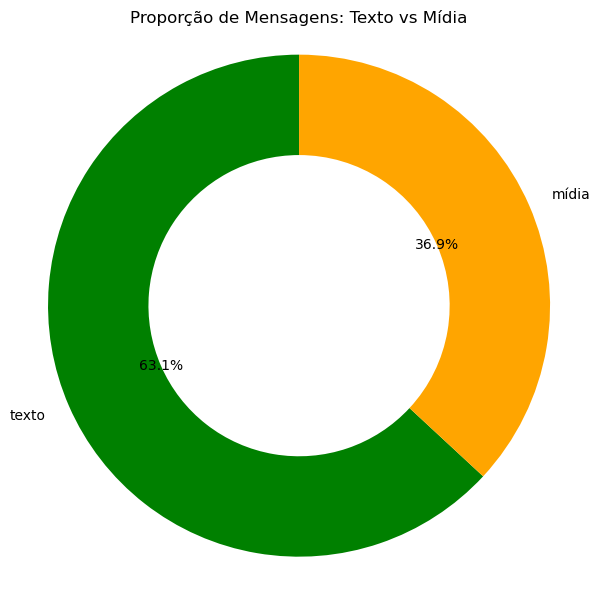

In [43]:
df['message_type_clean'] = df['message_type'].str.strip().str.lower()

tipos_midia = ['imagem', 'image', 'video', 'audio', 'url', 'application']

df['tipo'] = df['message_type_clean'].apply(lambda x: 'mídia' if x in tipos_midia else 'texto')

count = df['tipo'].value_counts()

labels = count.index
values = count.values

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['green', 'orange'],
    wedgeprops=dict(width=0.4)
)

ax.set_title('Proporção de Mensagens: Texto vs Mídia')
ax.axis('equal')
plt.tight_layout()
plt.show()


## 3. Quantidade de mensagens por tipo de mídia (jpg, mp4 etc);

message_type
Imagem         77831
Url            39863
Video           3808
Application     2798
Audio             22
Image              2
Name: count, dtype: int64


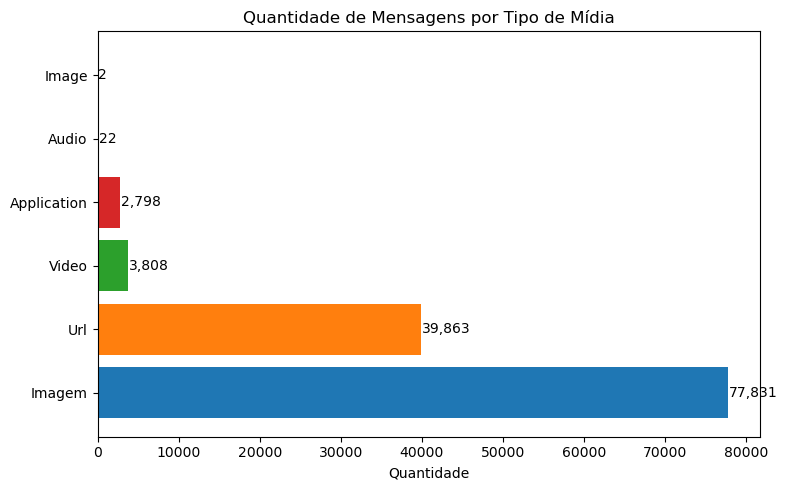

In [51]:
tipos_midia = ['Imagem', 'Image', 'Video', 'Audio', 'Url', 'Application']
df_midia = df[df['message_type'].isin(tipos_midia)]

media_counts = df_midia['message_type'].value_counts()

print(media_counts)

plt.figure(figsize=(8, 5))
bars = plt.barh(media_counts.index, media_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}', va='center')

plt.title('Quantidade de Mensagens por Tipo de Mídia')
plt.xlabel('Quantidade')
plt.tight_layout()
plt.show()



## 4. A relação entre a quantidade de mensagens e a quantidade de palavras presente nas mensagens;

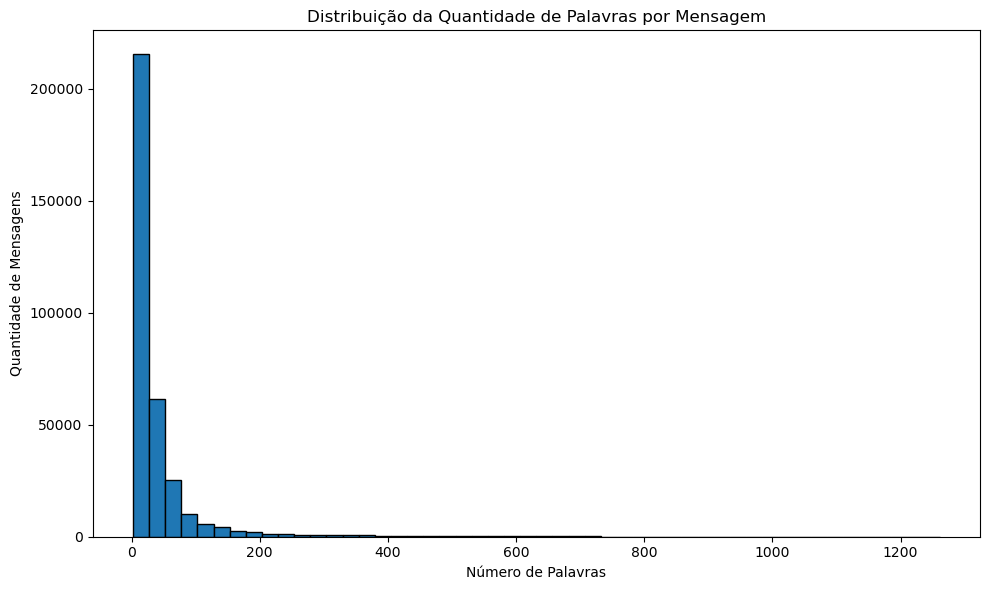

In [52]:
df['num_palavras'] = df['text_content_anonymous'].fillna('').apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(df['num_palavras'], bins=50, color='#1f77b4', edgecolor='black')
plt.title('Distribuição da Quantidade de Palavras por Mensagem')
plt.xlabel('Número de Palavras')
plt.ylabel('Quantidade de Mensagens')
plt.tight_layout()
plt.show()


## 5. Quantidade de mensagens por estado;

## 6. Quantidade de usuários por estado;

## 7. Relação quantidade de usuários por quantidade de mensagens por estado;

## 8. Quantidade de mensagens por país;

## 9. Quantidade de mensagens Brasil X Países Estrangeiros;

In [53]:
import re
from collections import Counter

padrao_url = r'(https?://[^\s]+)'
urls_extraidas = df['text_content_anonymous'].dropna().apply(lambda x: re.findall(padrao_url, x))

todas_urls = [url for sublist in urls_extraidas for url in sublist]

contagem_urls = Counter(todas_urls)

top_30_urls = contagem_urls.most_common(30)

top_urls_df = pd.DataFrame(top_30_urls, columns=['URL', 'Frequência'])
print(top_urls_df)


                                                  URL  Frequência
0     https://youtube.com/c/especulandoosfatosoficial        1607
1                              https://t.me/apostagem         567
2                           https://t.me/Ovetoroculto         439
3                      https://t.me/+DnJpx-HxNCFkMmUx         400
4                      https://t.me/+SLVkezIiNKkkH4sy         400
5                        https://youtu.be/qbTzhB0akt8         395
6            https://www.marxists.org/portugues/ma...         364
7                          https://t.me/ipiranoticias         358
8             https://t.me/Manager_Marcus_Chat_Up_Now         353
9                    http://ligapatriota.blogspot.com         350
10  https://youtube.com/channel/UCVvPvyD-zdnTTapAb...         349
11          https://t.me/ContagemDeVotosPRO_BOLSONARO         322
12                       https://youtu.be/zDuOoyhyN-4         309
13  https://instagram.com/exercito_oficial?igshid=...         299
14        

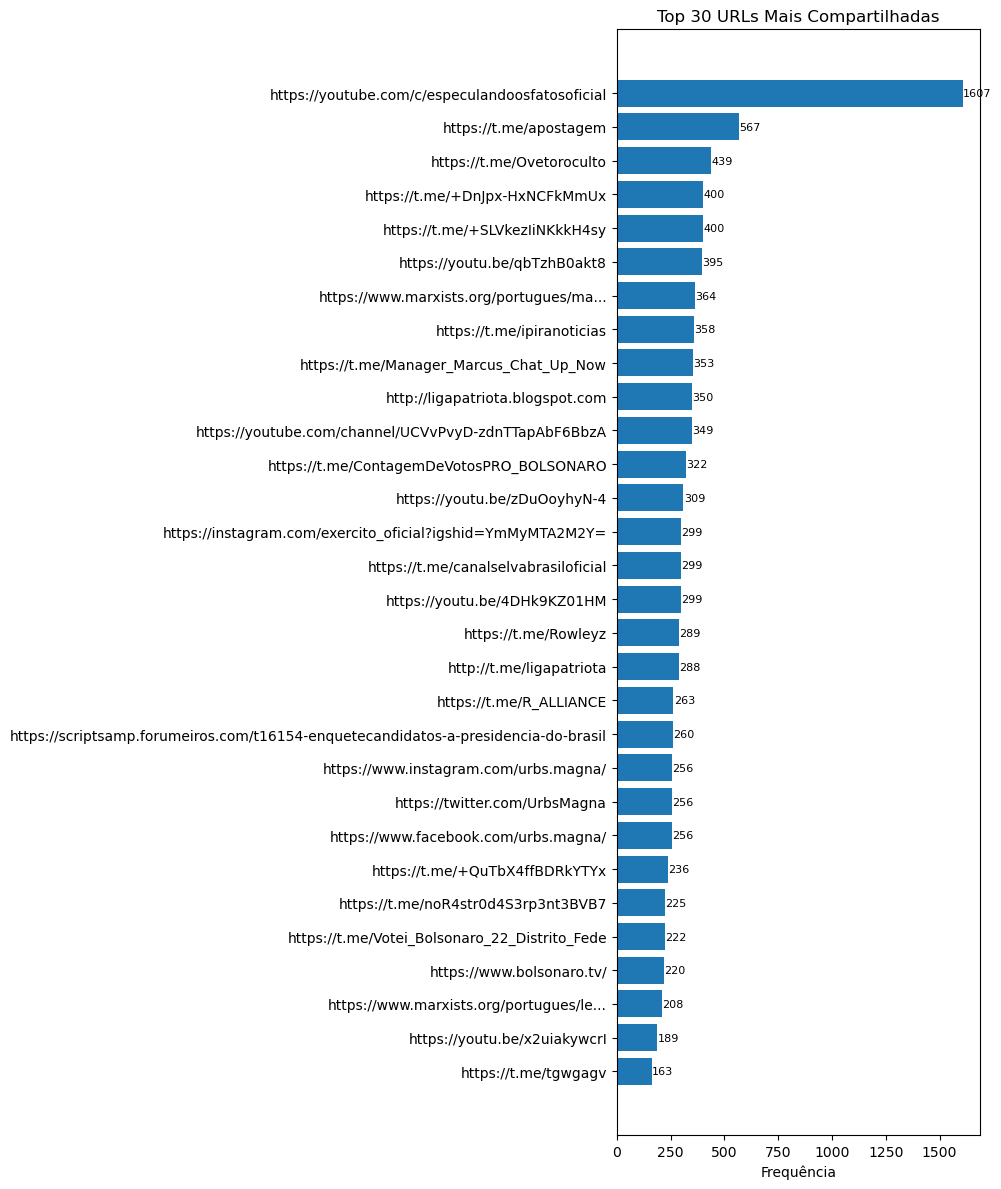

In [55]:
plt.figure(figsize=(10, 12))
bars = plt.barh(top_urls_df['URL'], top_urls_df['Frequência'])

for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', fontsize=8)

plt.title('Top 30 URLs Mais Compartilhadas')
plt.xlabel('Frequência')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 11. Os 30 domínios que mais se repetem (mais compartilhados);

In [58]:
from urllib.parse import urlparse

def extrair_dominio(url):
    try:
        netloc = urlparse(url).netloc
        return netloc.replace('www.', '') if netloc else None
    except Exception:
        return None

dominios = [extrair_dominio(url) for url in todas_urls]
dominios = [d for d in dominios if d]  # remove None

contagem_dominios = Counter(dominios)
top_30_dominios = contagem_dominios.most_common(30)

top_dominios_df = pd.DataFrame(top_30_dominios, columns=['Domínio', 'Frequência'])

In [62]:
top_dominios_df

Domínio  Frequência
0                      youtu.be       17837
1                          t.me       16749
2       terrabrasilnoticias.com        6382
3                   youtube.com        6330
4   jornaldacidadeonline.com.br        4395
5                 instagram.com        2663
6             chat.whatsapp.com        2163
7                   twitter.com        1662
8                    pleno.news        1331
9   aliadosbrasiloficial.com.br         916
10               kwai-video.com         841
11                       bit.ly         800
12      verdadecensurada.com.br         789
13           vistapatria.com.br         772
14      divirta-ce.blogspot.com         748
15             revistaoeste.com         746
16                 facebook.com         696
17       conexaopolitica.com.br         627
18                 marxists.org         624
19       tribunanacional.com.br         583
20             apostagem.com.br         568
21                    gettr.com         558
22            theepochtimes.com         506
23                   rumble.com         486
24            brasilsemmedo.com         485
25                       gov.br         459
26         direitaonline.com.br         416
27                 bitchute.com         396
28        clubedeautores.com.br         395
29               blockchain.com         389

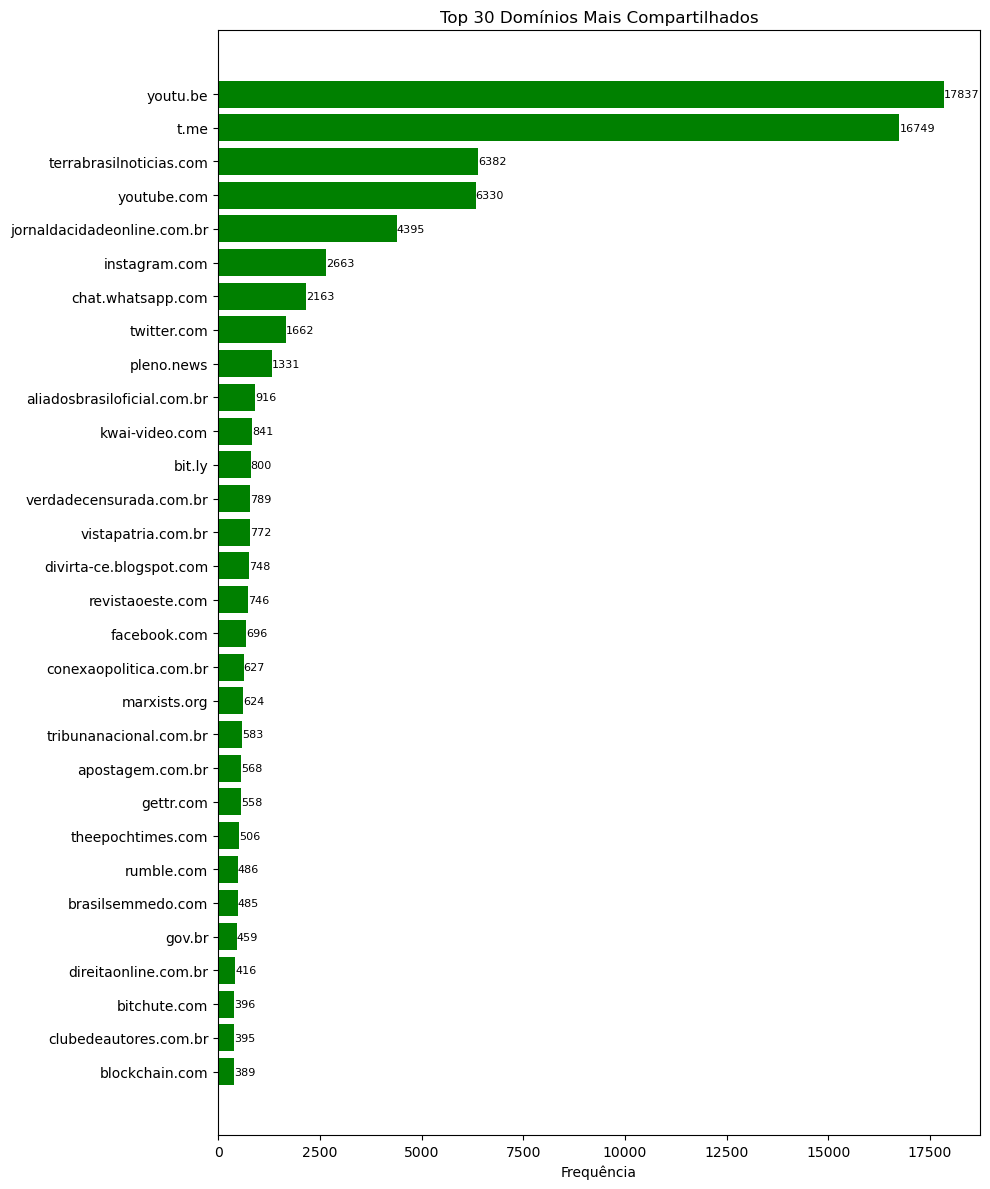

In [64]:
plt.figure(figsize=(10, 12))
bars = plt.barh(top_dominios_df['Domínio'], top_dominios_df['Frequência'], color='green')

for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', fontsize=8)

plt.title('Top 30 Domínios Mais Compartilhados')
plt.xlabel('Frequência')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 12. Os 30 usuários mais ativos;

In [72]:
usuarios_mais_ativos = df['id_member_anonymous'].value_counts().head(30)

top_usuarios_df = usuarios_mais_ativos.reset_index()
top_usuarios_df.columns = ['Usuário', 'Mensagens']


In [73]:
top_usuarios_df

Usuário  Mensagens
0   abe534d581ec6d552243d6955d3c3cd8      12289
1   1665e22b0f564cd46d343f7677014821       5452
2   1ac091b8ed5c4e42383f1b4ff4cc9b2d       3205
3   c743967449a387ad2c1c7e03b2c45b36       3017
4   d49f81df0c75d1d72bee6c5b2d707da0       1571
5   f233cf8b1d4ede06f32199a7e0081bf5       1087
6   e8fd8fee8c39342d37993775da7756d5       1027
7   e7998863ac2a40086657fab4a6b463c9        921
8   c052c859b42c5a1923c22f5a201de746        825
9   fa582c9e95da255e44f4c198d0daf3df        754
10  56b8359fd127312651b80b8ed8030085        626
11  7696d5103cdb8ac352d748a1db1126b0        621
12  a378e9743fa3ca297df321cfa0e7cf6a        612
13  fbbbfb737acb18812f7de2400841abc3        590
14  e5e3e38d433016adf62ea34432853a3c        565
15  9b34f45b5f8af4c37ba9ec1ebe2e3606        526
16  53e74af95497f943c524abaaa9482e33        525
17  a398999c55f8d6f0c65760522ae12e45        520
18  f4561a21fb26cfbebf48dcd5c557f82f        517
19  26b496125c8b6773bce453e14f172430        505
20  beb77036ff26e78865da19310ac95169        488
21  7d41f1a2df245b0cc870f546c2aead0b        483
22  b4ce87d44421ef3d2c4710051df5fe40        478
23  bd7859770eef94f34d0344a5397c5443        466
24  9794a13f91433216821ad18624372498        462
25  79fa510c3ab44548d903284ab9162c9d        462
26  5d321b03e74b751ac577ef022350306d        451
27  566ba5c5eeeac2fc18b65965c3909a1f        444
28  3f64a652deccf6273d7d769252bdfb46        444
29  773b9bd5b02a2e96f9d732c29bfcb663        443

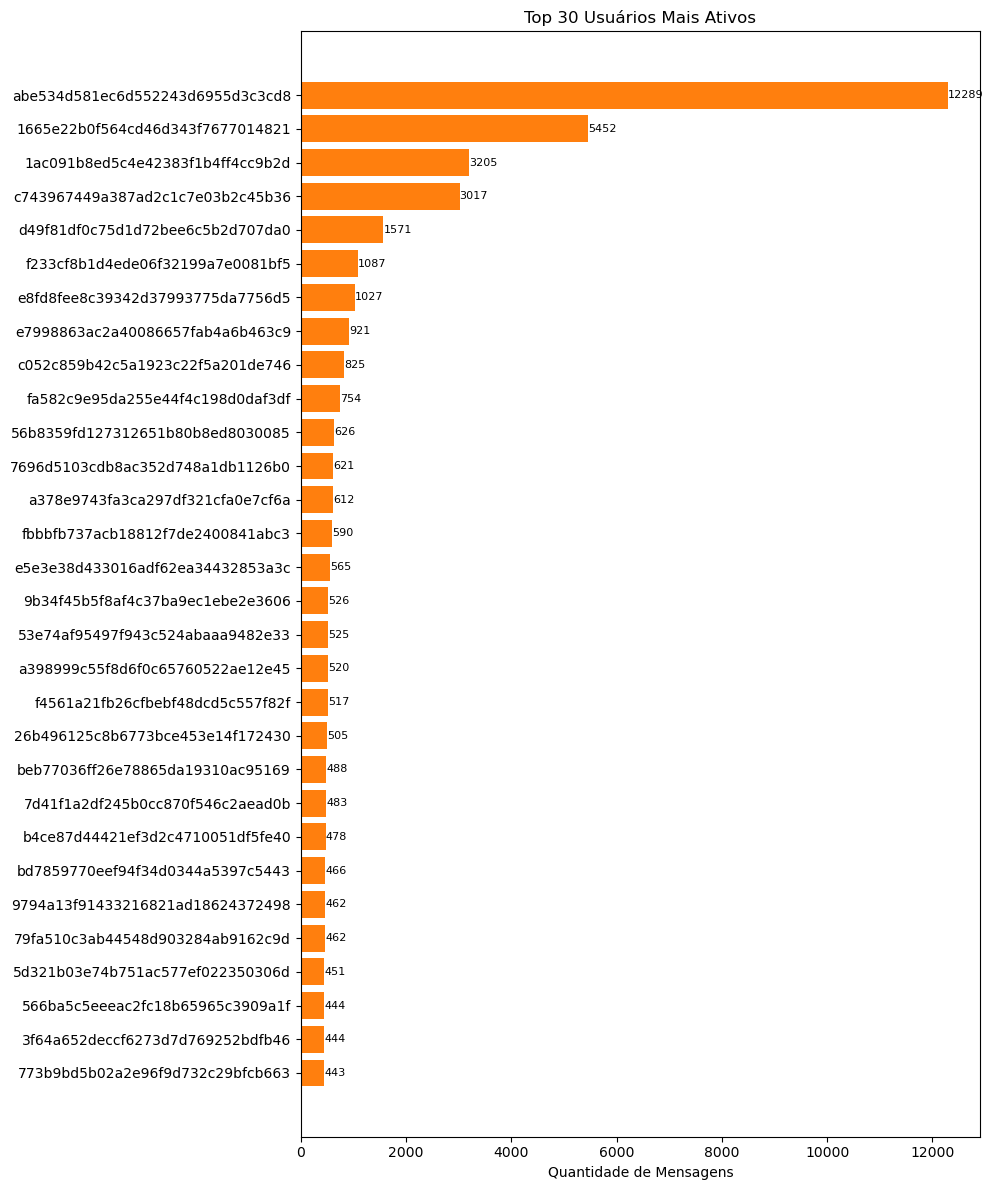

In [74]:
plt.figure(figsize=(10, 12))
bars = plt.barh(top_usuarios_df['Usuário'], top_usuarios_df['Mensagens'], color='#ff7f0e')

for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', fontsize=8)

plt.title('Top 30 Usuários Mais Ativos')
plt.xlabel('Quantidade de Mensagens')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


## 13. Relação entre quantidade de mensagens contendo somente texto e mensagens com tendo mídia dos usuários mais ativos:

C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\3481914433.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['is_texto'] = df_top['message_type'].isin(tipos_texto)
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\3481914433.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['is_midia'] = df_top['message_type'].isin(tipos_midia)


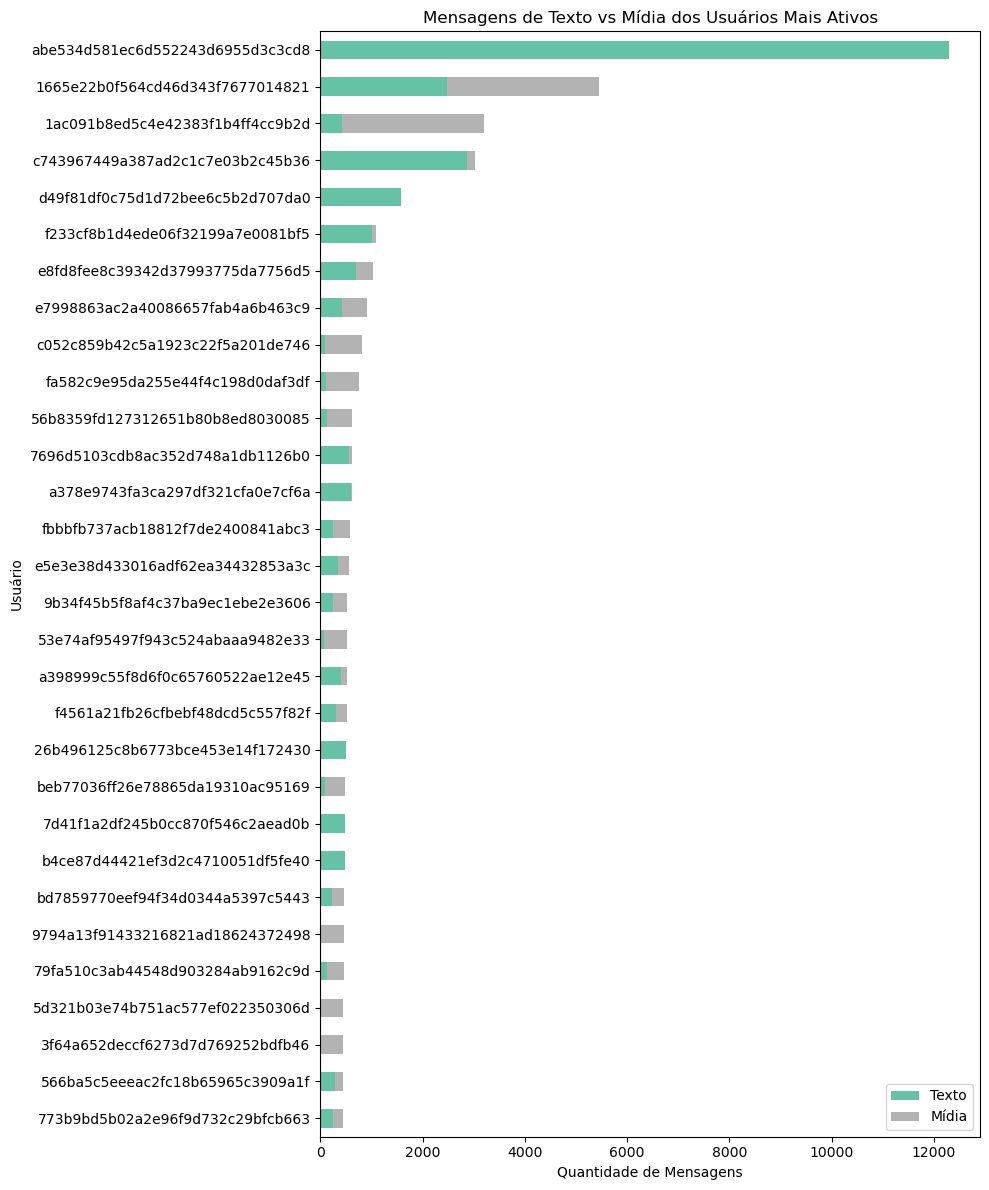

In [84]:
tipos_texto = ['Texto', 'Text']
tipos_midia = ['Imagem', 'Image', 'Video', 'Audio', 'Application', 'Url']

df_filtrado = df[df['id_member_anonymous'].notna()]

top_usuarios = df_filtrado['id_member_anonymous'].value_counts().head(30).index

df_top = df_filtrado[df_filtrado['id_member_anonymous'].isin(top_usuarios)]

df_top['is_texto'] = df_top['message_type'].isin(tipos_texto)
df_top['is_midia'] = df_top['message_type'].isin(tipos_midia)

agrupado = df_top.groupby('id_member_anonymous')[['is_texto', 'is_midia']].sum()

agrupado.columns = ['Texto', 'Mídia']

agrupado['Total'] = agrupado['Texto'] + agrupado['Mídia']
agrupado = agrupado.sort_values(by='Total', ascending=False)

agrupado = agrupado[['Texto', 'Mídia']]

agrupado.plot(kind='barh', stacked=True, figsize=(10, 12), colormap='Set2')
plt.title('Mensagens de Texto vs Mídia dos Usuários Mais Ativos')
plt.xlabel('Quantidade de Mensagens')
plt.ylabel('Usuário')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 14. Os 30 usuários que mais compartilharam texto;

C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\2470710009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['is_texto'] = df_top['message_type'].isin(tipos_texto)


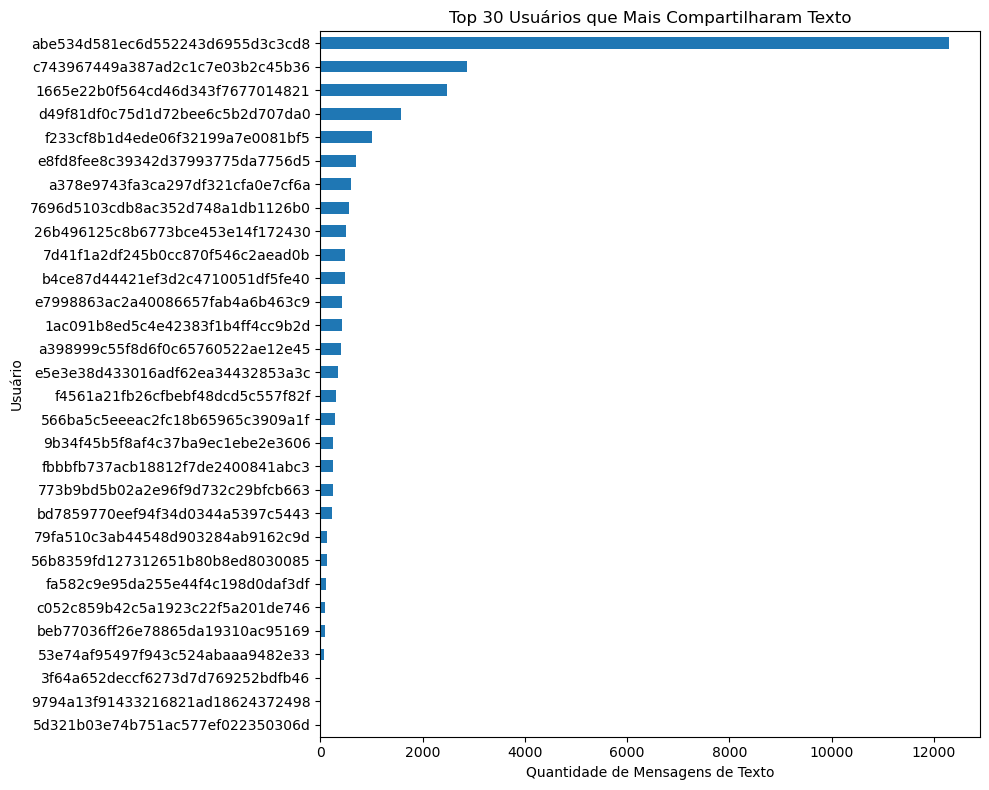

In [89]:
df_top = df_filtrado[df_filtrado['id_member_anonymous'].isin(top_usuarios)]

df_top['is_texto'] = df_top['message_type'].isin(tipos_texto)

agrupado = df_top.groupby('id_member_anonymous')[['is_texto']].sum()
agrupado.columns = ['Texto']

agrupado = agrupado.sort_values(by='Texto', ascending=False)

agrupado.plot(kind='barh', figsize=(10, 8), legend=False)
plt.title('Top 30 Usuários que Mais Compartilharam Texto')
plt.xlabel('Quantidade de Mensagens de Texto')
plt.ylabel('Usuário')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 15. Os 30 usuários que mais compartilharam mídias;

C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\2538446631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['is_midia'] = df_top['message_type'].isin(tipos_midia)


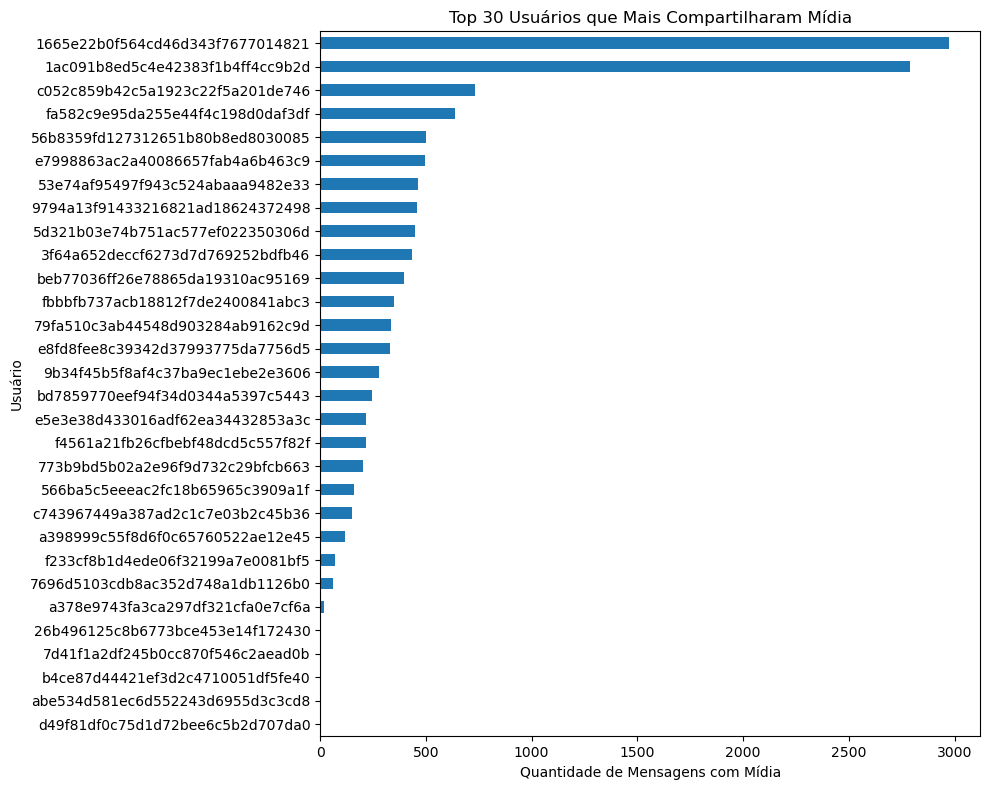

In [90]:
df_top['is_midia'] = df_top['message_type'].isin(tipos_midia)

agrupado = df_top.groupby('id_member_anonymous')[['is_midia']].sum()
agrupado.columns = ['Mídia']

agrupado = agrupado.sort_values(by='Mídia', ascending=False)

agrupado.plot(kind='barh', figsize=(10, 8), legend=False)
plt.title('Top 30 Usuários que Mais Compartilharam Mídia')
plt.xlabel('Quantidade de Mensagens com Mídia')
plt.ylabel('Usuário')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 16. As 30 mensagens mais compartilhadas;

In [94]:
mais_compartilhadas = df['text_content_anonymous'].value_counts().dropna().head(30)

top_msgs_df = mais_compartilhadas.reset_index()
top_msgs_df.columns = ['Mensagem', 'Frequência']

print(top_msgs_df.to_string(index=False))


C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\3592733868.py:8: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\3592733868.py:8: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\3592733868.py:8: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\3592733868.py:8: UserWarning: Glyph 127762 (\N{WAXING CRESCENT MOON SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\3592733868.py:8: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pedro.santiago\AppData\Local\

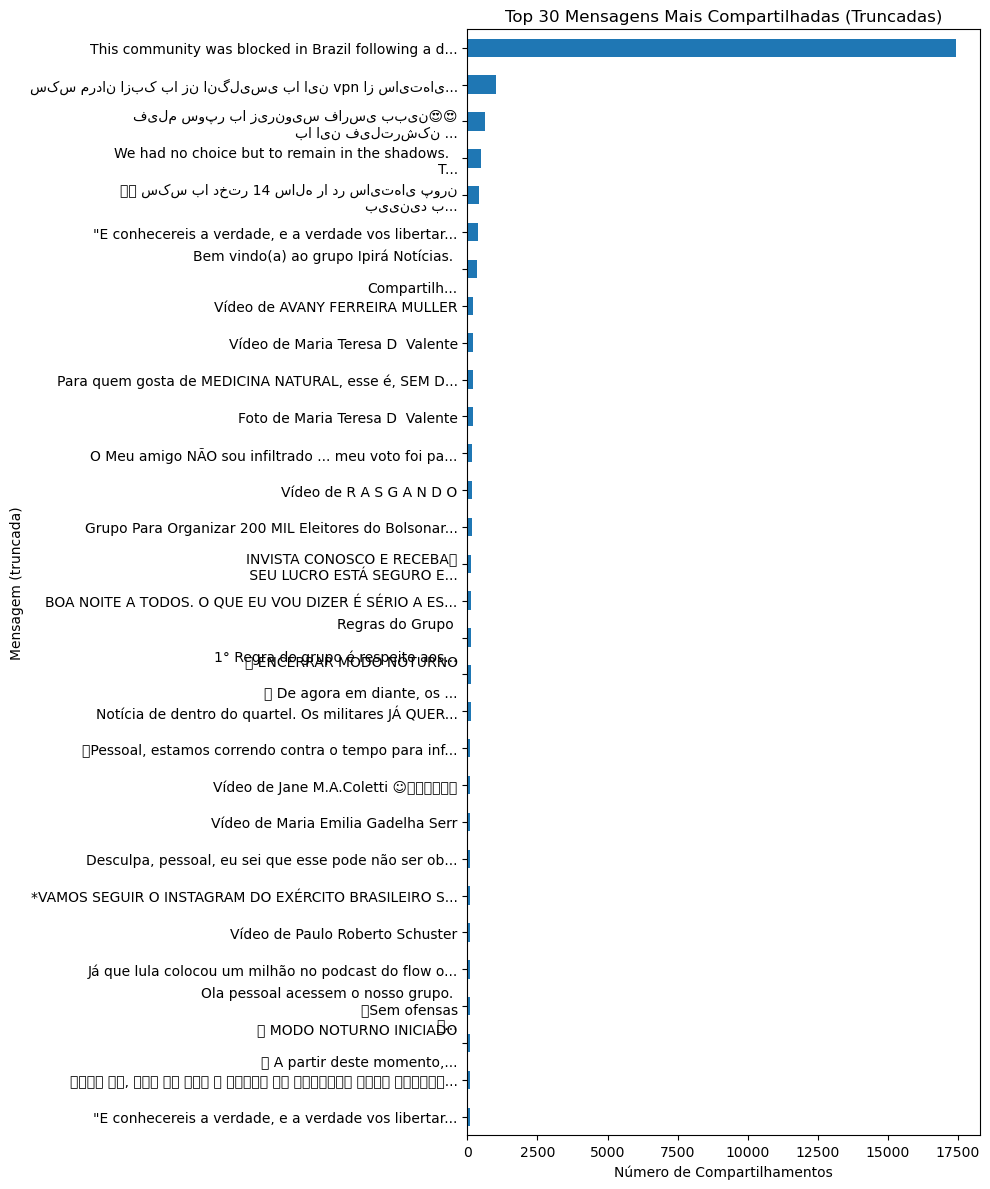

In [95]:
top_msgs_df['Mensagem_truncada'] = top_msgs_df['Mensagem'].apply(lambda x: x[:50] + '...' if len(x) > 50 else x)

top_msgs_df.plot(kind='barh', y='Frequência', x='Mensagem_truncada', figsize=(10, 12), legend=False)
plt.title('Top 30 Mensagens Mais Compartilhadas (Truncadas)')
plt.xlabel('Número de Compartilhamentos')
plt.ylabel('Mensagem (truncada)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 17. As 30 mensagens mais compartilhadas em grupos diferentes;

C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\2342226912.py:17: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\2342226912.py:17: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\2342226912.py:17: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\2342226912.py:17: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\2342226912.py:17: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pedro.santiago\AppData\Local\Temp\

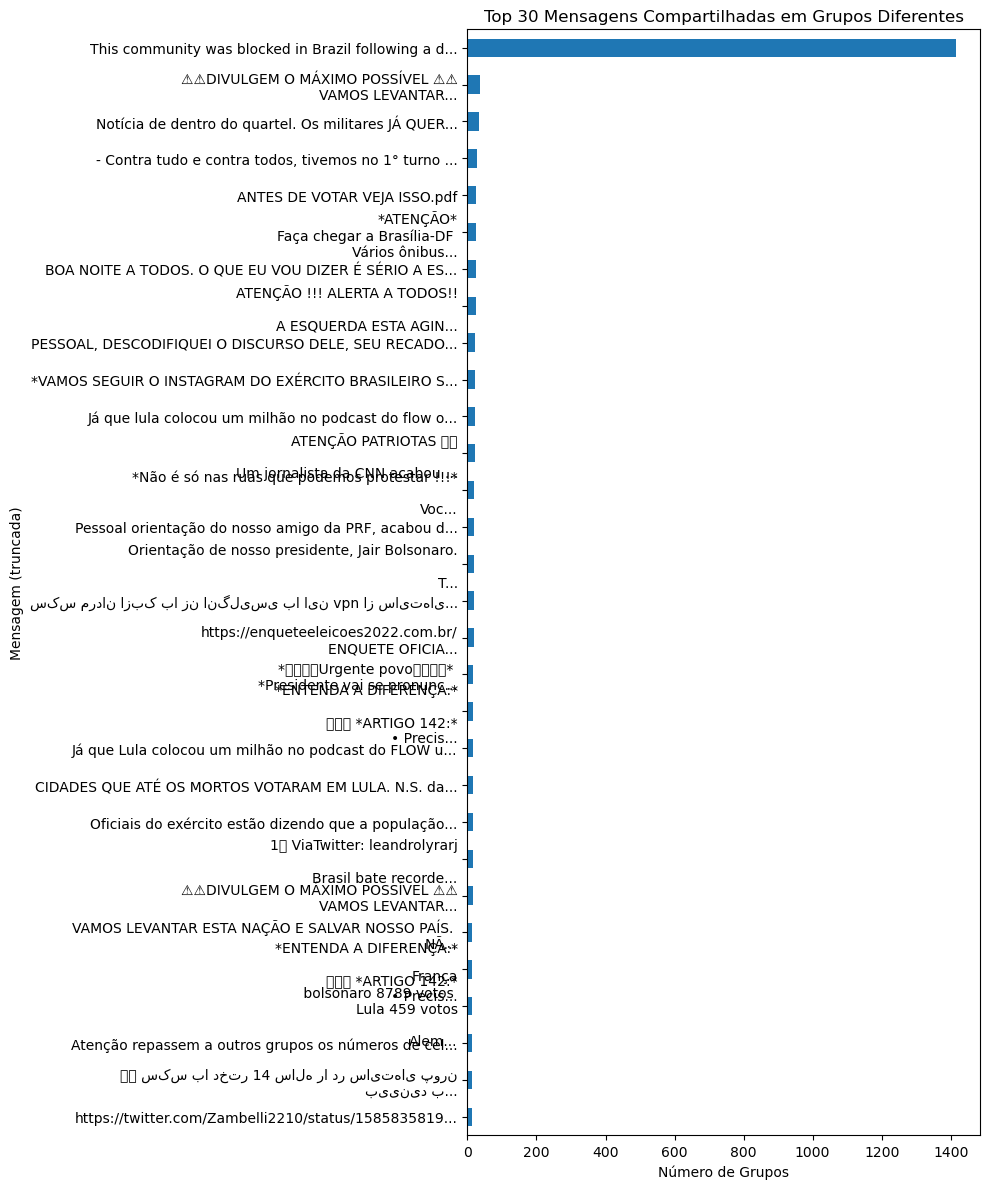

In [96]:
df_mensagens = df[['text_content_anonymous', 'id_member_anonymous']].dropna()

df_unique_msgs = df_mensagens.drop_duplicates()

grupos_por_msg = df_unique_msgs.groupby('text_content_anonymous')['id_member_anonymous'].nunique()

top_30_em_grupos = grupos_por_msg.sort_values(ascending=False).head(30).reset_index()
top_30_em_grupos.columns = ['Mensagem', 'Grupos Diferentes']

top_30_em_grupos['Mensagem_truncada'] = top_30_em_grupos['Mensagem'].apply(lambda x: x[:50] + '...' if len(x) > 50 else x)

top_30_em_grupos.plot(kind='barh', y='Grupos Diferentes', x='Mensagem_truncada', figsize=(10, 12), legend=False)
plt.title('Top 30 Mensagens Compartilhadas em Grupos Diferentes')
plt.xlabel('Número de Grupos')
plt.ylabel('Mensagem (truncada)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 18. Mensagens idênticas compartilhadas pelo mesmo usuário (e suas quantidades);

In [100]:
df_validas = df[['id_member_anonymous', 'text_content_anonymous']].dropna()

contagem = df_validas.groupby(['id_member_anonymous', 'text_content_anonymous']).size().reset_index(name='quantidade')

mensagens_repetidas = contagem[contagem['quantidade'] > 1]

mensagens_repetidas = mensagens_repetidas.sort_values(by='quantidade', ascending=False)

mensagens_repetidas.head(30)

id_member_anonymous  \
105164  f233cf8b1d4ede06f32199a7e0081bf5   
87241   c743967449a387ad2c1c7e03b2c45b36   
45333   7696d5103cdb8ac352d748a1db1126b0   
7259    1665e22b0f564cd46d343f7677014821   
61056   a398999c55f8d6f0c65760522ae12e45   
20010   2a4827f1d9ac158e15c1db59c038bea8   
100273  e7998863ac2a40086657fab4a6b463c9   
100035  e7998863ac2a40086657fab4a6b463c9   
109368  fba2e18e4328fe3d8029e44c542fe988   
86497   c743967449a387ad2c1c7e03b2c45b36   
41379   6adfedbb5ebea15b89d785ce436f6bc0   
10848   1665e22b0f564cd46d343f7677014821   
11470   17916aca7f2d50e4f30761dd76986ff6   
105594  f32fb55955515e8a98429f9089df960f   
11201   1665e22b0f564cd46d343f7677014821   
11222   167db5613cd8235c443146d086ef40aa   
45902   773b9bd5b02a2e96f9d732c29bfcb663   
37854   5f47c8d650969393e25000a927219611   
17264   23d14a50cb82952a04645e779f48206a   
27274   400ff18531c9aa277eadfd78d5a54a1e   
52436   8b890330b9d851d740d3536ac1567432   
24483   396c035099bb75f47a1f08f59432f82c   
11204   1665e22b0f564cd46d343f7677014821   
94612   d94337b1b8b21dc0cf178886c93d890e   
53273   8e53464d3b01eea3e39d07e51ecbb1b4   
27050   3f64a652deccf6273d7d769252bdfb46   
16544   228f47f93869575ec963d9a8a3c15918   
78760   b4ce87d44421ef3d2c4710051df5fe40   
86498   c743967449a387ad2c1c7e03b2c45b36   
85515   c6f406117d909c73ea9c11de8560f5c3   

                                   text_content_anonymous  quantidade  
105164  This community was blocked in Brazil following...         838  
87241   This community was blocked in Brazil following...         532  
45333   This community was blocked in Brazil following...         530  
7259    Bem vindo(a) ao grupo Ipirá Notícias. \n\nComp...         357  
61056   This community was blocked in Brazil following...         308  
20010   This community was blocked in Brazil following...         193  
100273                   Vídeo de Maria Teresa D  Valente         187  
100035                    Foto de Maria Teresa D  Valente         175  
109368  This community was blocked in Brazil following...         171  
86497   Grupo Para Organizar 200 MIL Eleitores do Bols...         152  
41379   This community was blocked in Brazil following...         134  
10848   Regras do Grupo \n\n1° Regra do grupo é respei...         127  
11470   سکس مردان ازبک با زن انگلیسی با این vpn از سای...         127  
105594  سکس مردان ازبک با زن انگلیسی با این vpn از سای...         124  
11201   🌒 ENCERRAR MODO NOTURNO\n\n✅ De agora em diant...         117  
11222   فیلم سوپر با زیرنویس فارسی ببین😍😍\nبا این فیلت...         110  
45902   This community was blocked in Brazil following...         107  
37854                  Vídeo de Jane M.A.Coletti ☺️🇧🇷🇧🇷🇧🇷         104  
17264   سکس مردان ازبک با زن انگلیسی با این vpn از سای...         104  
27274   This community was blocked in Brazil following...          98  
52436   This community was blocked in Brazil following...          94  
24483   فیلم سوپر با زیرنویس فارسی ببین😍😍\nبا این فیلت...          94  
11204   🌒 MODO NOTURNO INICIADO\n\n❌ A partir deste mo...          94  
94612   سکس مردان ازبک با زن انگلیسی با این vpn از سای...          93  
53273   𝐇𝐎𝐋𝐃 𝐎𝐍, 𝐋𝐄𝐓 𝐌𝐄 𝐑𝐔𝐍 𝐀 𝐂𝐇𝐄𝐂𝐊 𝐓𝐎 𝐂𝐎𝐌𝐅𝐈𝐑𝐌 𝐘𝐎𝐔𝐑 𝐏𝐀...          93  
27050   "E conhecereis a verdade, e a verdade vos libe...          89  
16544   This community was blocked in Brazil following...          89  
78760   ⚡️🇧🇷 Actus Liberandi - Ordem De Cristo 🇧🇷\n\n✨...          89  
86498   Grupo de Ação, Para Organizar 200 MIL Eleitore...          88  
85515   Ola! Tudo bem? A nossa enquete eleitoral esta ...          85

## 19. Mensagens idênticas compartilhadas pelo mesmo usuário em grupos distintos (e suas quantidades);

In [102]:
df_validas = df[['id_member_anonymous', 'text_content_anonymous', 'id_group_anonymous']].dropna()

df_unique = df_validas.drop_duplicates()

grupo_por_msg_usuario = df_unique.groupby(['id_member_anonymous', 'text_content_anonymous'])['id_group_anonymous'].nunique().reset_index()

grupo_por_msg_usuario = grupo_por_msg_usuario[grupo_por_msg_usuario['id_group_anonymous'] > 1]

grupo_por_msg_usuario = grupo_por_msg_usuario.rename(columns={'id_group_anonymous': 'grupos_diferentes'})

grupo_por_msg_usuario = grupo_por_msg_usuario.sort_values(by='grupos_diferentes', ascending=False)


grupo_por_msg_usuario.head(30)


id_member_anonymous  \
62037   a7840e7844020149e197272748965862   
23066   326d0a2f1bc5a1ede446fcf5dc31ff2e   
23065   326d0a2f1bc5a1ede446fcf5dc31ff2e   
19769   29dda76df3384c28a07e8bad1ee9ceed   
31376   4e93f1d3c83fd6041314517363b14ed5   
95952   dc60c84ed8dec03b667c577e124c5540   
40191   67aef6d8321facd89b2f5ebbb0825b77   
52170   8aefec38fba2426877f7fccbfbd9846f   
11409   170c5c5b240f668bca7b25e677283c06   
77520   b3489cb73e571d03d359a79ca41e1c9c   
31378   4e93f1d3c83fd6041314517363b14ed5   
110068  fd91a031b77ce4f2ce42756e891774ad   
33293   5358e8926f7faebab66b09a87945f2a9   
41418   6af5166069b463db5980d6f68eaac7a5   
94357   d846b401cb960c00a22af5697cabf015   
61510   a49d88be9798210cb06f9171b4d7317c   
19767   29dda76df3384c28a07e8bad1ee9ceed   
90297   cdafe8bef79fe7104e4c893f2c0b8e40   
49290   823d50d70391d543ef35dfa7f6737610   
80704   bad95a1894e094db36714e5eea1cf0b8   
110061  fd91a031b77ce4f2ce42756e891774ad   
110050  fd91a031b77ce4f2ce42756e891774ad   
110051  fd91a031b77ce4f2ce42756e891774ad   
110056  fd91a031b77ce4f2ce42756e891774ad   
110059  fd91a031b77ce4f2ce42756e891774ad   
110060  fd91a031b77ce4f2ce42756e891774ad   
110062  fd91a031b77ce4f2ce42756e891774ad   
110065  fd91a031b77ce4f2ce42756e891774ad   
110070  fd91a031b77ce4f2ce42756e891774ad   
45091   762b3696b26db306fbd2022412c47bd1   

                                   text_content_anonymous  grupos_diferentes  
62037   ALERTA\nESSE GRUPO FOI CRIADO PELA ESQUERDA CO...                 16  
23066   💣💥((((( URGENTÍSSIMO )))))💥💣\nESSE GRUPO É UMA...                 14  
23065   💣💣💣💥💥🔰BOMBA BOMBA🔰💥💥💣💣💣\nVCS ESTÃO ACHANDO QUE...                 12  
19769   BOA NOITE A TODOS. O QUE EU VOU DIZER É SÉRIO ...                 11  
31376   Pessoal não envie seus comprovantes de votação...                 10  
95952   INTERCESSÃO PELO BRASIL!!\n\nChegou a hora da ...                 10  
40191   https://t.me/+hXARlf2UnEEwOTVh\nESTÃO QUERENDO...                  9  
52170   MEU PRESIDENTE MAÇOM SATÂNICO E DEFENSOR DO AB...                  9  
11409   Acabei de receber  a informação que esse grupo...                  8  
77520   ESSE GRUPO PODE SER DE ESQUERDA CUIDADO🚫🚫🚫🚫🚫🚫🚫...                  8  
31378   🚫🚫 VAMOS DENUNCIAR🚫🚫\nTODOS OS GRUPOS USANDO A...                  7  
110068  R7: Campanha de Bolsonaro diz que Lula teve 15...                  7  
33293   🔴🔴🔴Alerta para salafrário se fingindo de conse...                  7  
41418   Desculpa, pessoal, eu sei que esse pode não se...                  7  
94357   Esse video da maçonaria foi a pá de cal meus i...                  7  
61510   Conheça a Aloe Vera, conhecida como a "planta ...                  7  
19767   *“E aí?”: Malafaia resgata vídeo de Alckmin na...                  7  
90297   Voto confirmado! ✌️😎✌️\n\nPatriotas, agora vam...                  7  
49290   ATENÇÃO A TODOS OS PATRIOTAS CRISTÃOS!!!! \nBo...                  7  
80704   TELEGRAM NEWS:\n\nBOLSONARO É VISTO EM MAÇONAR...                  7  
110061  Lula é a favor do Aborto \nhttps://youtu.be/st...                  7  
110050      - É daqui a pouco! LINK: youtu.be/qbTzhB0akt8                  7  
110051  A expectativa dos auxiliares do presidente é d...                  7  
110056  Diário do Poder: Marco Aurélio: ‘homens de bem...                  7  
110059  Em relação a reunião do Presidente Bolsonaro c...                  7  
110060  Gazeta do Povo: Alexandre de Moraes obriga Jov...                  7  
110062  LulaFlix – Conheça a verdade sobre o ex-presid...                  7  
110065  O caso de desvio de dinheiro destinado a respi...                  7  
110070  Rádios confirmam que não receberam do TSE mate...                  7  
45091   AO VIVO ANÁLISE DO FILME "UM DRINK NO INFERNO"...                  6

## 20. Os 30 unigramas, bigramas e trigramas mais compartilhados (após a remoção de stop words);

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

stop_words_arabic = stopwords.words('arabic')
stop_words_russian = stopwords.words('russian')
stop_words_chinese = stopwords.words('chinese')
stop_words_english = stopwords.words('english')
stop_words_portuguese = stopwords.words('portuguese')

all_stopwords = stop_words_arabic + stop_words_russian + stop_words_chinese + stop_words_english + stop_words_portuguese

df_texto = df[df['message_type'].isin(tipos_texto) & df['text_content_anonymous'].notna()]

mensagens = df_texto['text_content_anonymous'].astype(str).tolist()

def get_top_ngrams(corpus, ngram_range=(1, 1), top_n=30):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=all_stopwords)
    X = vectorizer.fit_transform(corpus)
    total_counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    contagem = list(zip(vocab, total_counts))
    return sorted(contagem, key=lambda x: x[1], reverse=True)[:top_n]

top_unigrams = get_top_ngrams(mensagens, ngram_range=(1, 1))
top_bigrams = get_top_ngrams(mensagens, ngram_range=(2, 2))
top_trigrams = get_top_ngrams(mensagens, ngram_range=(3, 3))

print("\nTop 30 Unigramas:")
for unigram, freq in top_unigrams:
    print(f"{unigram}: {freq}")

print("\nTop 30 Bigramas:")
for bigram, freq in top_bigrams:
    print(f"{bigram}: {freq}")

print("\nTop 30 Trigramas:")
for trigram, freq in top_trigrams:
    print(f"{trigram}: {freq}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro.santiago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\pedro.santiago\AppData\Local\miniforge3\envs\cd\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(



Top 30 Unigramas:
13: 50017
bolsonaro: 48575
presidente: 31589
lula: 31528
grupo: 29510
brasil: 28757
pra: 28349
todos: 25261
user: 24410
tse: 23973
povo: 23493
vai: 23036
https: 21939
intervenção: 20939
vamos: 20051
telegram: 19362
deus: 18671
superior: 18343
brazil: 17694
decision: 17476
community: 17445
electoral: 17435
following: 17435
court: 17434
blocked: 17423
agora: 16277
aqui: 15735
militar: 15423
pessoas: 15376
tudo: 14716

Top 30 Bigramas:
13 13: 42679
electoral court: 17423
blocked brazil: 17422
brazil following: 17422
community blocked: 17422
court tse: 17422
decision superior: 17422
following decision: 17422
superior electoral: 17422
managing telegram: 14169
professional tool: 14169
telegram groups: 14169
tool managing: 14169
user professional: 14169
intervenção militar: 8463
55 phone: 7499
militar intervenção: 6429
pau mão: 6386
intervenção pau: 6383
mão intervenção: 6331
pra rua: 6303
rua pra: 5362
bora bora: 5338
forças armadas: 5194
intervenção federal: 4604
segundo 

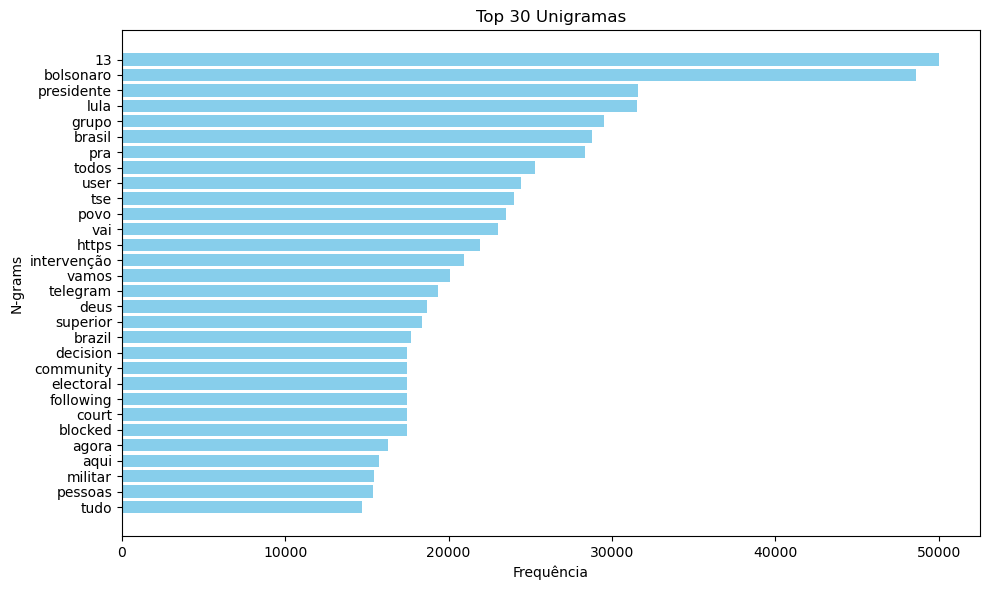

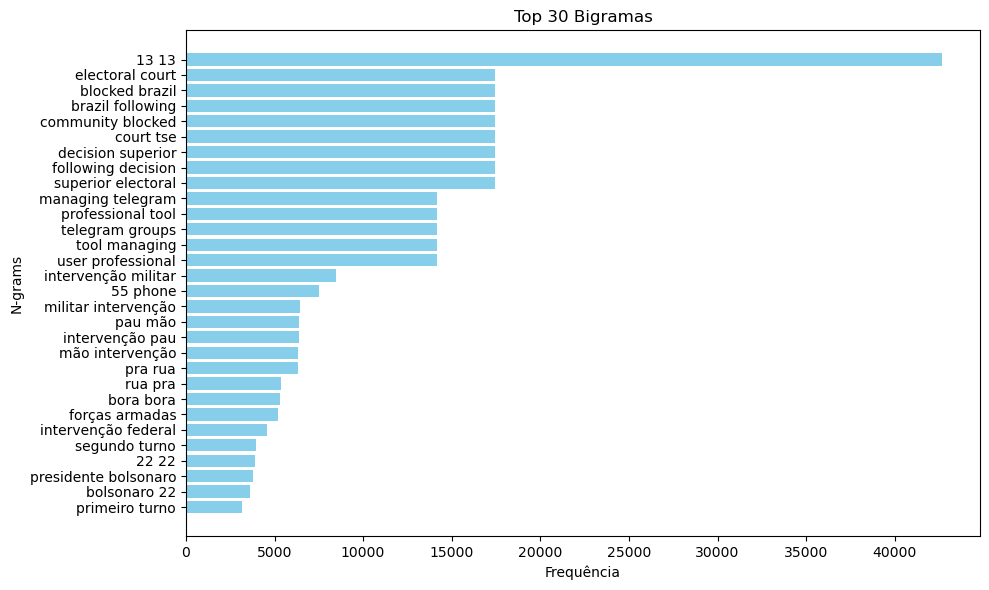

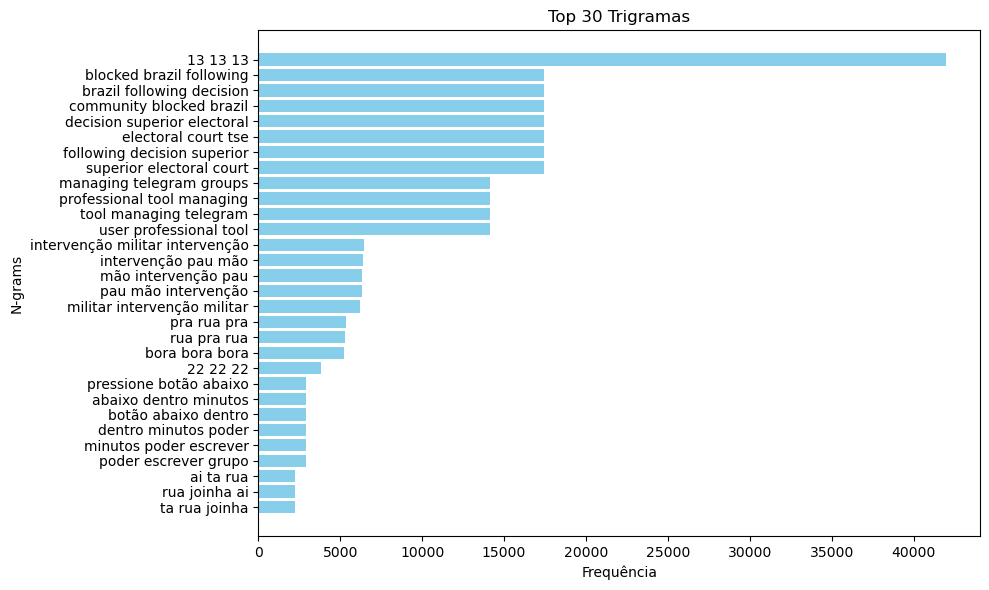

In [114]:
def plot_top_ngrams(ngrams, title="Top N-grams"):
    ngrams_labels, frequencies = zip(*ngrams)
    
    plt.figure(figsize=(10, 6))
    plt.barh(ngrams_labels, frequencies, color='skyblue')
    
    plt.xlabel('Frequência')
    plt.ylabel('N-grams')
    plt.title(title)
    plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()

plot_top_ngrams(top_unigrams, title="Top 30 Unigramas")
plot_top_ngrams(top_bigrams, title="Top 30 Bigramas")
plot_top_ngrams(top_trigrams, title="Top 30 Trigramas")


## 21. As 30 mensagens mais positivas (distintas);

In [117]:
positive_messages = df_texto[df_texto['score_sentiment'] > 0]

positive_messages_distinct = positive_messages.drop_duplicates(subset='text_content_anonymous')

top_30_positive_messages = positive_messages_distinct.nlargest(30, 'score_sentiment')

top_30_positive_messages[['text_content_anonymous', 'score_sentiment']]


text_content_anonymous  score_sentiment
39074   Shemoneh Esreh – Amidá – A Grande Oração\n\n ,...           0.9992
38846   בונה ירושלים, Bo'ne Yetrushalayim - Benção da ...           0.9989
83944   Olá ,\n\nUM AMIGO ME PERGUNTOU EM QUEM EU VOTE...           0.9986
241445  BOM DIA A TODOS. ENTENDO QUE ESTAMOS VIVENDO D...           0.9986
57325   Uma forma bem legal\nPara quem ainda não sabe ...           0.9985
11680   “Paz!”\nObrigada amados meus, por mais esta An...           0.9984
175256  Yom Ha-Shishi (O SEXTO DIA)?\n\nE agora, sem m...           0.9984
69402   *Cincoin community!* Junte-se ao futuro que ho...           0.9983
111900  Salmo 136\n\nRendei graças ao Eterno porque el...           0.9983
227313  Sobre Fxcapitalgrowth\n  FCAPITAGRWTH.COM é de...           0.9981
70980   Deus é bom o tempo todo\n\nCom que frequência ...           0.9978
192255  Louve a Deus em Todos os Momentos\n\n\n\nImagi...           0.9978
204511  ⚠️🆙AS MARCAS DE UMA FÉ VITORIOSA\n\nEstá escri...           0.9978
245688  A gente come feijão puro feijão puro feijão pu...           0.9978
85846   2 Crônicas 6\nSalomão fala ao povo\n6 Então Sa...           0.9977
22946   Vamos ver um texto aqui?\n\nQuero provar pra v...           0.9976
296910  As cinco  virgens prudentes que receberam as c...           0.9976
98992   GOSTAR?\n\nOlá,\nUm amigo perguntou-me: \nEm q...           0.9975
161090  Ao Criador,\n\nCriador de todas as Possibilida...           0.9975
262967  AS MESMAS COISAS SUCEDEM AOS JUSTOS  E INJUSTO...           0.9975
70844   E se eu lhe disser que a democracia uma fraude...           0.9974
84960   UM AMIGO ME PERGUNTOU EM QUEM EU VOTEI, RESPON...           0.9974
108710  Pois bem, os discípulos ficam a noite toda ten...           0.9974
246867  Amados!\nOs olhos do mundo estavam voltados pa...           0.9974
147706  3. Investigar as leis ainda não explicadas da ...           0.9973
176709  📣📣📣 EXATAMENTE O QUE FALAMOS AQUI DESDE O INÍC...           0.9973
53399   UM AMIGO ME PERGUNTOU EM QUEM Q EU VOTEI , RES...           0.9971
62213   UM AMIGO ME PERGUNTOU EM QUEM QUEM EU VOTEI , ...           0.9971
67886   ✨🙌🙏✨✨✨✨\nEm espírito, em verdade\nTe adoramos,...           0.9971
174147  📣📣📣 EXATAMENTE O QUE FALAMOS AQUI DESDE O INÍC...           0.9971

## 22. As 30 mensagens mais negativas (distintas);

In [118]:
negative_messages = df_texto[df_texto['score_sentiment'] < 0]

negative_messages_distinct = negative_messages.drop_duplicates(subset='text_content_anonymous')

top_30_negative_messages = negative_messages_distinct.nsmallest(30, 'score_sentiment')

top_30_negative_messages[['text_content_anonymous', 'score_sentiment']]


text_content_anonymous  score_sentiment
11626   CAPITÃOZINHO DE MERDA 💩\nCAPITÃOZINHO DE MERDA...          -1.0000
1073    Intervenção é meu pau na tua mão\nIntervenção ...          -0.9999
2298    ME CÚ NO PAU DO BOLSONARO \nME CÚ NO PAU DO BO...          -0.9999
18209   Gente, a Zambelli nos abandonou! Traiu a nossa...          -0.9999
65663   Intervenção é meu pau na tua mão\nIntervenção ...          -0.9999
120943  fraude fraude fraude fraude fraude fraude frau...          -0.9999
186197  ai ta na rua da um joinha 👍Quem ai ta na rua d...          -0.9999
214591  E nós aqui nos sacrificando, aguentando sol, c...          -0.9999
5725    ha 👍Quem ai ta na rua da um joinha 👍Quem ai ta...          -0.9998
8085    Quem ai ta na rua da um joinha 👍Quem ai ta na ...          -0.9998
9261    a rua da um joinha 👍Quem ai ta na rua da um jo...          -0.9998
9262    nha 👍Quem ai ta na rua da um joinha 👍Quem ai t...          -0.9998
16817   inha 👍Quem ai ta na rua da um joinha 👍Quem ai ...          -0.9998
65410   ta na rua da um joinha 👍Quem ai ta na rua da u...          -0.9998
89913   a rua da um joinha 👍Quem ai ta na rua da um jo...          -0.9998
106288  a rua da um joinha 👍Quem ai ta na rua da um jo...          -0.9998
157174  a na rua da um joinha 👍Quem ai ta na rua da um...          -0.9998
178419  Sobre a morte como política global e a necessi...          -0.9998
205761  na rua da um joinha 👍Quem ai ta na rua da um j...          -0.9998
205762  na rua da um joinha 👍Quem ai ta na rua da um j...          -0.9998
223423  ai ta na rua da um joinha 👍Quem ai ta na rua d...          -0.9998
69995   OS COVARDES E ANTI PATRIOTAS BOLSONARISTAS\n\n...          -0.9997
279927  OS COVARDES E ANTI PATRIOTAS BOLSONARISTAS\n\n...          -0.9997
58390   Precisamos nos unir imediatamente, todos os ca...          -0.9996
191924  FRAUDE FRAUDE FRAUDE FRAUDE FRAUDE FRAUDE FRAU...          -0.9996
82037   O capitão já jogou a toalha. Acordem.\nChega d...          -0.9994
258558  EU PAU Ó 🫴🫴🫴🫴🫴🫴🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷🇧🇷ATENÇÃO !!!!!!! 🚨...          -0.9994
85449   VOU FAZER MELHOR...,VOU TE DAR APNAS 100 MOTIV...          -0.9993
4497    INTERVENÇÃO É MEU PAU NA TUA MÃO!!\n\nINTERVEN...          -0.9992
51928   UM EX-PRESIDIÁRIO\n\nCerta feita, por total in...          -0.9992

## 23. O usuário mais otimista;

In [120]:
user_sentiment_avg = df_texto.groupby('id_member_anonymous')['score_sentiment'].mean()

most_optimistic_user = user_sentiment_avg.idxmax()

most_optimistic_user_score = user_sentiment_avg[most_optimistic_user]

most_optimistic_user, most_optimistic_user_score


('5d0e50d6d2183bf16ec637ed24131870', np.float64(0.9967))

## 24. O usuário mais pessimista;

In [122]:
user_sentiment_avg = df_texto.groupby('id_member_anonymous')['score_sentiment'].mean()

most_pessimistic_user = user_sentiment_avg.idxmin()

most_pessimistic_user_score = user_sentiment_avg[most_pessimistic_user]

most_pessimistic_user, most_pessimistic_user_score


('243a43d802953032e1ea9a363546c3b8', np.float64(-0.9992))

## 25. As 30 maiores mensagens;

In [123]:
df_texto['message_length'] = df_texto['text_content_anonymous'].apply(len)

top_30_largest_messages = df_texto[['id_member_anonymous', 'text_content_anonymous', 'message_length']].sort_values(by='message_length', ascending=False).head(30)

top_30_largest_messages


C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\1937254678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texto['message_length'] = df_texto['text_content_anonymous'].apply(len)


id_member_anonymous  \
191589  f482bce90a9407e20634bf3d3660558e   
240381  fea1db96601338fc9ed2b2b190c7574f   
35054   f4561a21fb26cfbebf48dcd5c557f82f   
257141  f482bce90a9407e20634bf3d3660558e   
9508    08c5c519d8d1ec8b2033ac8e2b74b510   
9507    08c5c519d8d1ec8b2033ac8e2b74b510   
241805  fea1db96601338fc9ed2b2b190c7574f   
73830   08c5c519d8d1ec8b2033ac8e2b74b510   
61430   adc36f63f2f969861fd6dfaea80f7b91   
173828  adc36f63f2f969861fd6dfaea80f7b91   
311330  bd193b0dc70113a2d7032045177920e6   
307329  fea1db96601338fc9ed2b2b190c7574f   
8330    08c5c519d8d1ec8b2033ac8e2b74b510   
274372                              None   
65705   08c5c519d8d1ec8b2033ac8e2b74b510   
174739  adc36f63f2f969861fd6dfaea80f7b91   
216759  f482bce90a9407e20634bf3d3660558e   
280616  adc36f63f2f969861fd6dfaea80f7b91   
244966  b7b37ff8fe4be166a767e6323d126484   
8141    fed389afd2e15b29c98a5c6f56d15b75   
178419  764b87521493f954f784d875313b13e7   
12238   fed389afd2e15b29c98a5c6f56d15b75   
179954  fed389afd2e15b29c98a5c6f56d15b75   
104202  fed389afd2e15b29c98a5c6f56d15b75   
7928    8294d1400a9c3b268b23bb3047185101   
289293                              None   
50502                               None   
44086                               None   
157282                              None   
91783   662a05575311a2f0864295a762c3033a   

                                   text_content_anonymous  message_length  
191589  CCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHOO...            4096  
240381  Trecho do livro “Prática da Conspiração A Agen...            4096  
35054   PROPOSTAS DE BOLSONARO PARA 2023 - POSTADAS AG...            4096  
257141  CCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHOO...            4096  
9508    ROIA♘ ♞HERON★�CAVALO★§�DE★§�§TROIA♘ ♞HERON★�CA...            4096  
9507    ROIA♘ ♞HERON★�CAVALO★§�DE★§�§TROIA♘ ♞HERON★�CA...            4096  
241805  Trecho do livro “Prática da Conspiração A Agen...            4096  
73830   ROIA♘ ♞HERON★�CAVALO★§�DE★§�§TROIA♘ ♞HERON★�CA...            4096  
61430   1: Aconteceu também naqueles dias, quando não ...            4096  
173828  1: Naqueles dias não havia melech em Yisra-EL;...            4096  
311330  [Encaminhado de FYI-Brasil (Sú)]\n🚨ELEIÇÕES DE...            4096  
307329  Trecho do livro “Prática da Conspiração A Agen...            4096  
8330    ROIA♘ ♞HERON★�CAVALO★§�DE★§�§TROIA♘ ♞HERON★�CA...            4096  
274372  COMO O SOCIALISMO DESTRUIU A VENEZUELA EM POUC...            4096  
65705   ROIA♘ ♞HERON★�CAVALO★§�DE★§�§TROIA♘ ♞HERON★�CA...            4096  
174739  1: Sansão foi a Gaza, e viu ali uma prostituta...            4096  
216759  CCCCCCCCCCCCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHOO...            4096  
280616  1: Aconteceu também naqueles dias, quando não ...            4096  
244966  Vamos lá... \nPra não perder o costume, mais u...            4095  
8141    1 – A Estratégia da Distração.\n\nO elemento p...            4095  
178419  Sobre a morte como política global e a necessi...            4095  
12238   1 – A Estratégia da Distração.\n\nO elemento p...            4095  
179954  1 – A Estratégia da Distração.\n\nO elemento p...            4095  
104202  1 – A Estratégia da Distração.\n\nO elemento p...            4095  
7928    [USER]⚠️⚠️DIVULGEM O MÁXIMO POSSÍVEL \n\nVAMOS...            4095  
289293  PERNAMBUCO ⚽️🎄 Prefeitura do Recife abre inscr...            4094  
50502   "Baumer, Lorenzo",,"033, 033 (l)","www.lorenzb...            4093  
44086   Apenas dois estrangeiros puderam subir ao pala...            4093  
157282  Atenção! Atenção! Atenção! O Administrador do ...            4093  
91783   Lula e a VARIG”\nSenhoras e senhores!!!\nVejam...            4093

## 26. As 30 menores mensagens;

In [124]:
top_30_shortest_messages = df_texto[['id_member_anonymous', 'text_content_anonymous', 'message_length']].sort_values(by='message_length', ascending=True).head(30)

top_30_shortest_messages


id_member_anonymous  \
73548                               None   
61768                               None   
1806                                None   
242527  1b63a04ed80b1ebc127dfe1b83a2efff   
325151                              None   
335621                              None   
325899                              None   
329231                              None   
50812                               None   
130693  76accd80cda1cf55018fa73b5a5d4a7c   
279580                              None   
258496  ca9012e972e0ea8235e55b9fe4b564c8   
171942                              None   
141159                              None   
256329                              None   
1853    81a366a8b516d6621d3c291453b216e9   
124469  c6619f94fb7b5ac0d8e7622525eafda7   
326351                              None   
104248  c699aada00a4c08b7220db52ae308c02   
133879                              None   
274036  95bcfecda22c0469ab82a6d1144e744a   
299933                              None   
39036   01567ade2217189810466c5d43ad14ac   
283862                              None   
189034  cd8705a207fe779e0c5576799ec5a8e2   
259869  e5e3e38d433016adf62ea34432853a3c   
311138  4f04e43887298312ac1fd249562def7c   
189060                              None   
257942  2cd1d9338e78ca2f42c6c371d2a4a1df   
325798  0e581e7f02deb040eec51909f7bb8377   

                             text_content_anonymous  message_length  
73548                        A G A S A L H E M - SE              22  
61768                 M I S E R I C O R D I A ! 🙈🙈🙈              29  
1806             Pior que o p r o x y não funcio na              34  
242527           T e n h o    r e f e r e n c i a s              34  
325151          👀 Got 👀 something 👀 in 👀 my 👀 eye 👀              35  
335621        .\n     I N F O R M E M - S E  !!!\n.              35  
325899       .\n          A L G O R I T M O  ...\n.              36  
329231        NÃO SEI SE 💩 OU 🤮 . QUE NOJO DESSE 🐸🐂              37  
50812         Como assim 48 a 41 ? É pra ser 80 a 5              37  
130693        Só uma resposta é viável: F R A U D E              37  
279580        Seu pai e sua mãe sabem o que é CLT ?              37  
258496        Aí e mesmo, não vi a data é do dia 29              37  
171942        Se o presidiário ganhar é F R A U D E              37  
141159        Sim, siga o q ele diz e veja no q dá.              37  
256329        A L A G O A S F O R A D O A R N O TSE              37  
1853         O que não é o caso do besta ai de cima              38  
124469       Vai ser às 15 ou às 9 da manhã? No Rio              38  
326351       Eu li. Ou vc não leu ou está de ma fé!              38  
104248     Já é dia 10 aí? 😳\nAqui ainda é dia 9...              39  
133879      O Pt só puxa o Brasil p fundo do poço .              39  
274036      Aqui é o grupo do RJ, Gil Diniz é de SP              39  
299933      Partes 1 ( acima ) e Parte 2 ( abaixo )              39  
39036      E irmos usando o A M A R E L O!!!\n🇧🇷💫🙏🌟              39  
283862      Partes 1 ( acima ) e Parte 2 ( abaixo )              39  
189034      Dia 30 será o dia D , ou mata ou morre,              39  
259869      Partes 1 ( acima ) e Parte 2 ( abaixo )              39  
311138      O povo tem é que ir pra cima desse aí 😈              39  
189060  .\nAGORA É TARDE ,\n\nA INÊS É MORTA ...\n.              39  
257942      Eu não sei por o link, acho que é o ADM              39  
325798     o rio vai ver o que ele vai fazer nada o              40

## 27. O dia em que foi publicado a maior quantidade de mensagens;

In [126]:
df_texto['date'] = pd.to_datetime(df_texto['date_message'])

messages_per_day = df_texto.groupby(df_texto['date'].dt.date).size()

most_messages_day = messages_per_day.idxmax()
most_messages_count = messages_per_day.max()

print(f"O dia com maior número de mensagens foi {most_messages_day} com {most_messages_count} mensagens.")


O dia com maior número de mensagens foi 2022-11-01 com 17277 mensagens.


C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\1516178035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texto['date'] = pd.to_datetime(df_texto['date_message'])


## 28. As mensagens que possuem as palavras “FACÇÃO” e “CRIMINOSA”;

In [127]:
filtered_messages = df_texto[df_texto['text_content_anonymous'].str.contains('FACÇÃO', case=False, na=False) &
                             df_texto['text_content_anonymous'].str.contains('CRIMINOSA', case=False, na=False)]

print(filtered_messages[['text_content_anonymous']])


                                   text_content_anonymous
9621    ✨✨ Perfeito o seu resumo. Perfeito! Soma-se a ...
18547   FHC E LULA DEVEM SER PRESOS PARA LIVRAR O BRAS...
27847   FHC E LULA DEVEM SER PRESOS PARA LIVRAR O BRAS...
27876   Um ladrão não irão comandar o nosso Brasil!!! ...
38917   Esses vermes inúteis TOGADOS são  BANDIDOS  al...
...                                                   ...
317101  CAMINHONEIROS  fechem o CEAGESP... PT NÃO É PA...
318563  Siugomes é como Olavo de Carvalho, falava,ou e...
318906  Foram oito bandidos, em quatro motos, armados ...
321689  Vamos as ruas quem tiver o vídeo e  fotos do b...
333571  Gentalha ignorante e lixo... Esquerdistas sujo...

[89 rows x 1 columns]


## 29. Quantidade de mensagens por dia e hora;

In [128]:
df['created_at'] = pd.to_datetime(df['date_message'])

df['date'] = df['date_message'].dt.date
df['hour'] = df['date_message'].dt.hour

messages_per_day_hour = df.groupby(['date', 'hour']).size().reset_index(name='message_count')

print(messages_per_day_hour)


            date  hour  message_count
0     2022-09-29     0            324
1     2022-09-29     1            355
2     2022-09-29     2            347
3     2022-09-29     3            231
4     2022-09-29     4            114
...          ...   ...            ...
1040  2022-11-11     8            110
1041  2022-11-11     9            152
1042  2022-11-11    10            103
1043  2022-11-11    11            230
1044  2022-11-11    12             27

[1045 rows x 3 columns]


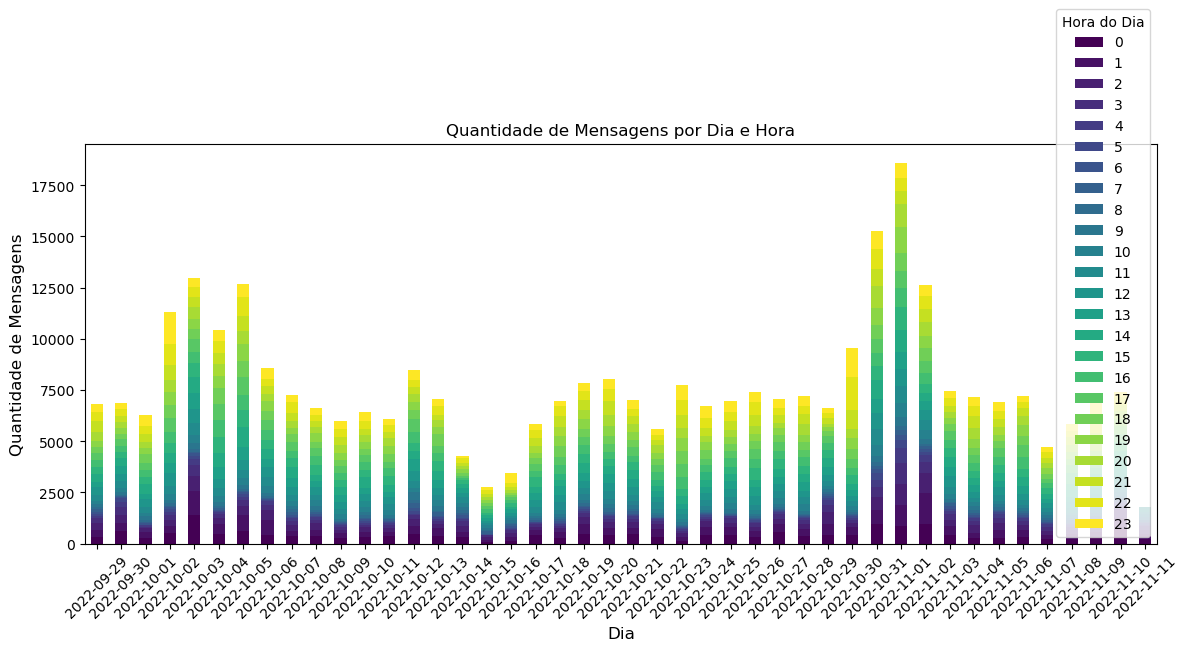

In [132]:
messages_per_day_hour_grouped = df.groupby(['date', 'hour']).size().unstack(fill_value=0)

messages_per_day_hour_grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('Quantidade de Mensagens por Dia e Hora')
plt.xlabel('Dia', fontsize=12)
plt.ylabel('Quantidade de Mensagens', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hora do Dia')

plt.tight_layout()
plt.show()


In [134]:
df['hour'] = df['date_message'].dt.hour

messages_per_hour = df.groupby('hour').size()

print(messages_per_hour)


hour
0     19163
1     18221
2     14191
3     10125
4      6294
5      3938
6      3511
7      4070
8      4713
9      7648
10    10617
11    14034
12    16265
13    16701
14    18372
15    18521
16    18355
17    18372
18    17434
19    17967
20    18106
21    18850
22    20946
23    20530
dtype: int64


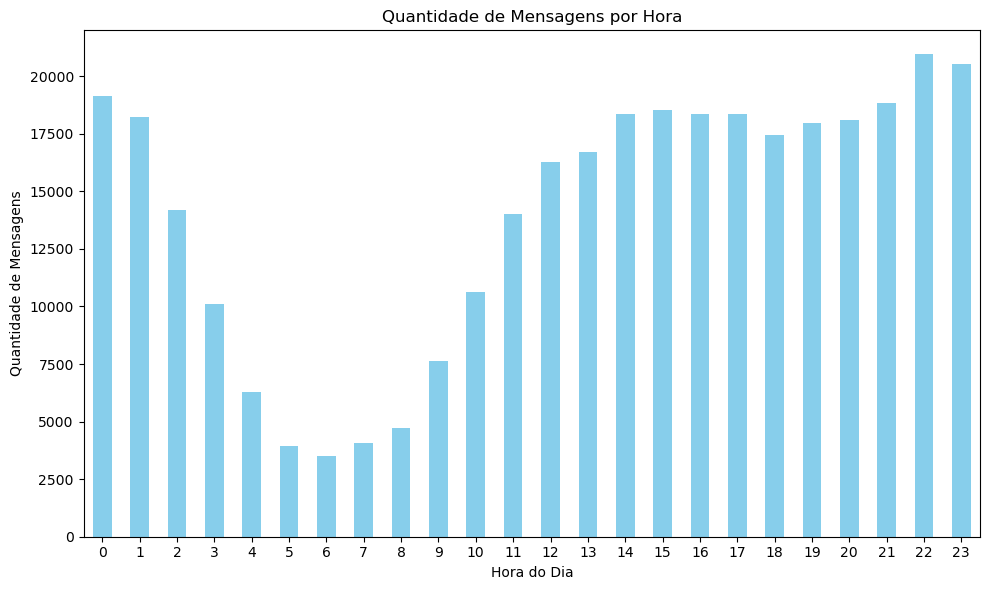

In [135]:
plt.figure(figsize=(10, 6))
messages_per_hour.plot(kind='bar', color='skyblue')

plt.title('Quantidade de Mensagens por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Quantidade de Mensagens')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


## 31. A nuvem de palavras referente às mensagens de texto (após a remoção de stop words);

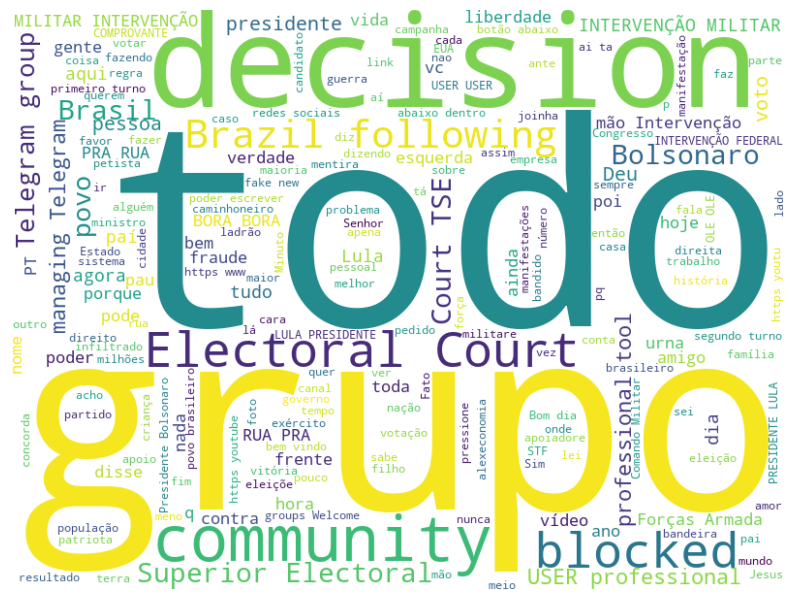

In [138]:
from wordcloud import WordCloud

texto = " ".join(df_texto['text_content_anonymous'].astype(str).tolist())

wordcloud = WordCloud(stopwords=all_stopwords, background_color="white", width=800, height=600).generate(texto)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## 32. A rede interativa das palavras referente às mensagens de texto (após a remoção de stop words);

c:\Users\pedro.santiago\AppData\Local\miniforge3\envs\cd\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


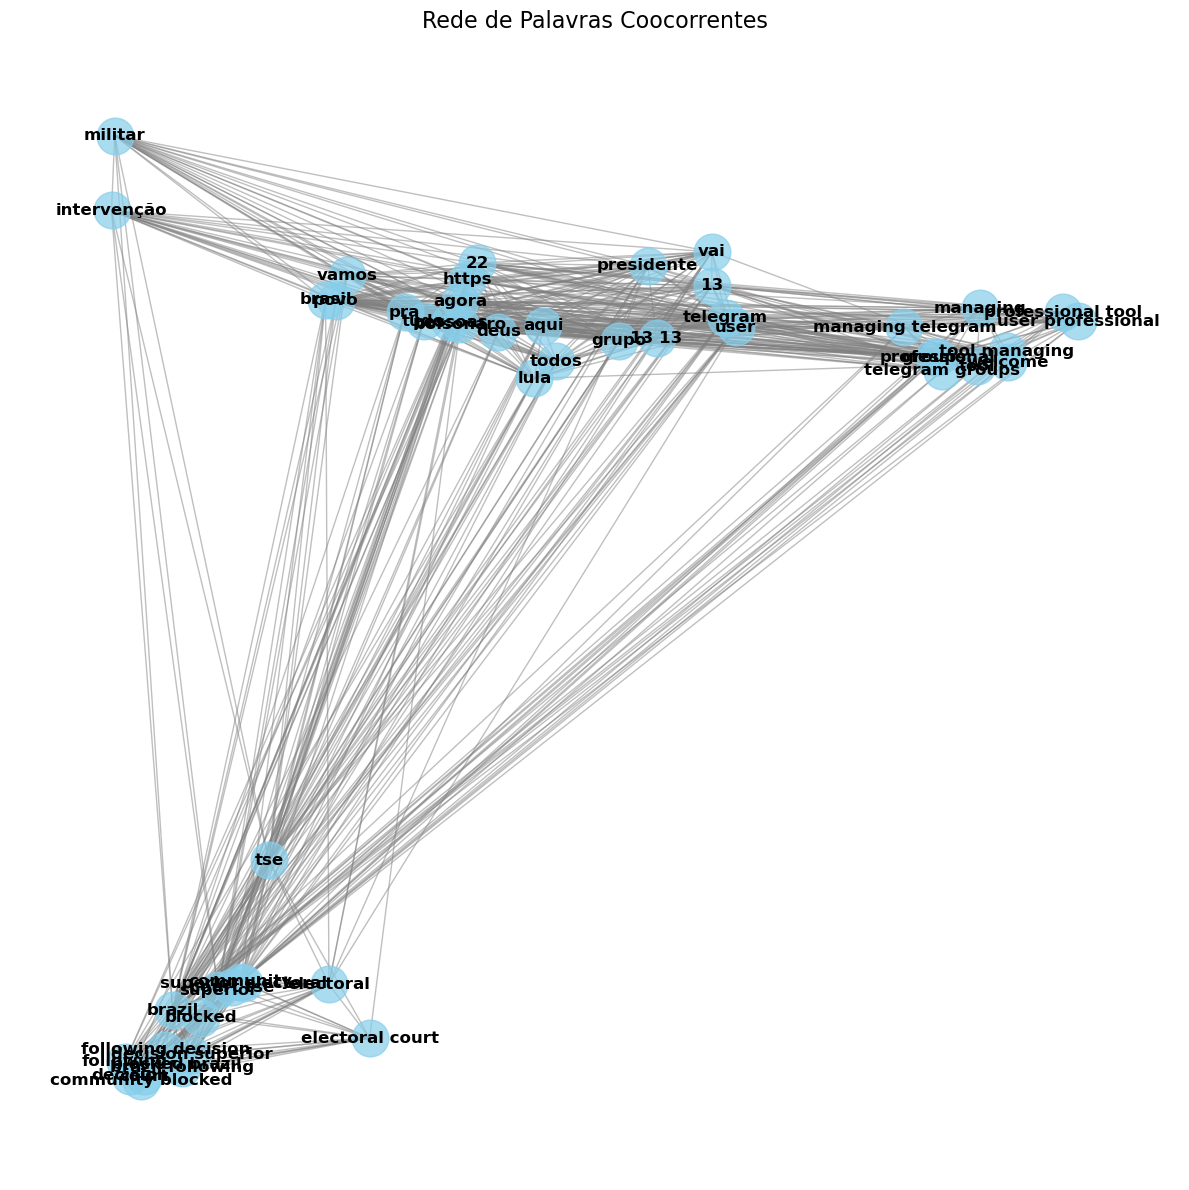

In [143]:
import networkx as nx

vectorizer = CountVectorizer(stop_words=all_stopwords, ngram_range=(1, 2), max_features=50)  # Para bigramas
X = vectorizer.fit_transform(df_texto['text_content_anonymous'].astype(str))

vocab = vectorizer.get_feature_names_out()
cooccurrences = X.T * X

G = nx.Graph()

for i in range(len(vocab)):
    G.add_node(vocab[i], size=10)

for i in range(len(vocab)):
    for j in range(i+1, len(vocab)):
        weight = cooccurrences[i, j]
        if weight > 0:
            G.add_edge(vocab[i], vocab[j], weight=weight)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)

nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif", font_weight='bold')

plt.title("Rede de Palavras Coocorrentes", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


## 33. Proporção de mensagens com e sem URL;

C:\Users\pedro.santiago\AppData\Local\Temp\ipykernel_18604\1820741463.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texto['has_url'] = df_texto['text_content_anonymous'].apply(contains_url)


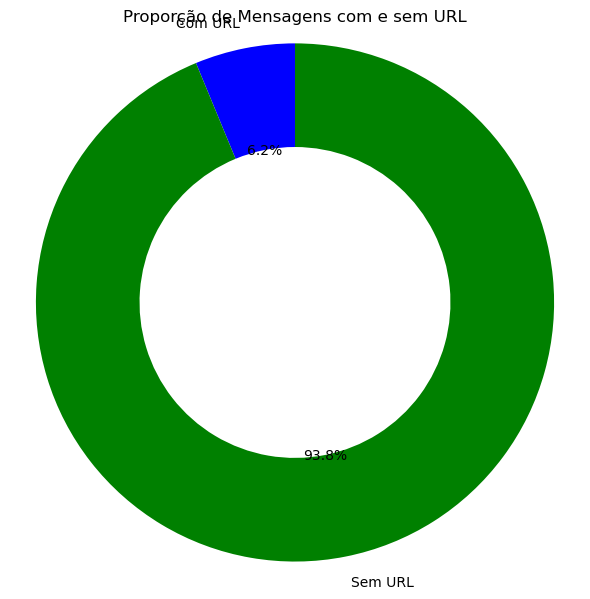

In [147]:
def contains_url(text):
    url_pattern = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"  # Expressão regular para URLs
    return bool(re.search(url_pattern, text))

df_texto['has_url'] = df_texto['text_content_anonymous'].apply(contains_url)

url_counts = df_texto['has_url'].value_counts()

labels = ['Com URL', 'Sem URL']
values = [url_counts[True], url_counts[False]]

fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['blue', 'green'],
    wedgeprops=dict(width=0.4)
)

ax.set_title('Proporção de Mensagens com e sem URL')

ax.axis('equal')

plt.tight_layout()

plt.show()


## 34. Proporção de desinformação;

## 35. Proporção de mensagens contendo mídia e desinformação;

## 36. Distribuição de mensagens por score de desinformação;

## 37. Proporção de sentimentos;

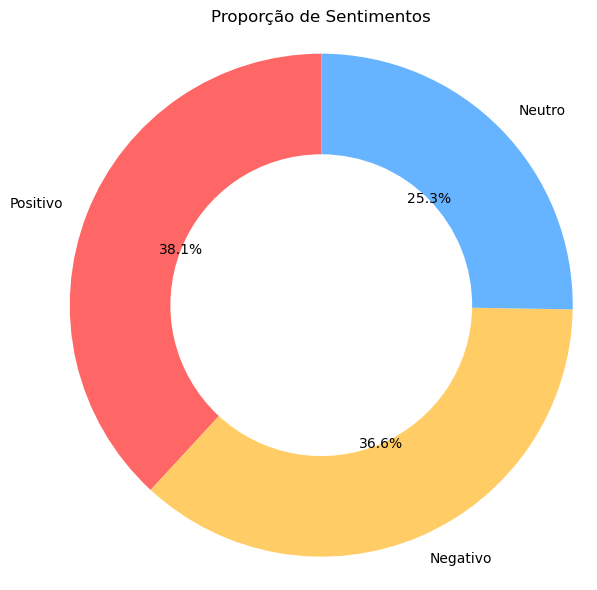

In [148]:
def classify_sentiment(score):
    if score < -0.1:
        return 'Negativo'
    elif score > 0.1:
        return 'Positivo'
    else:
        return 'Neutro'

df['sentiment_category'] = df['score_sentiment'].apply(classify_sentiment)

sentiment_counts = df['sentiment_category'].value_counts()

labels = sentiment_counts.index
values = sentiment_counts.values

fig, ax = plt.subplots(figsize=(6, 6))

wedges, texts, autotexts = ax.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff6666', '#ffcc66', '#66b3ff'],
    wedgeprops=dict(width=0.4)
)

ax.set_title('Proporção de Sentimentos')

ax.axis('equal')

plt.tight_layout()

plt.show()


## 38. Distribuição de mensagens por score de sentimentos;

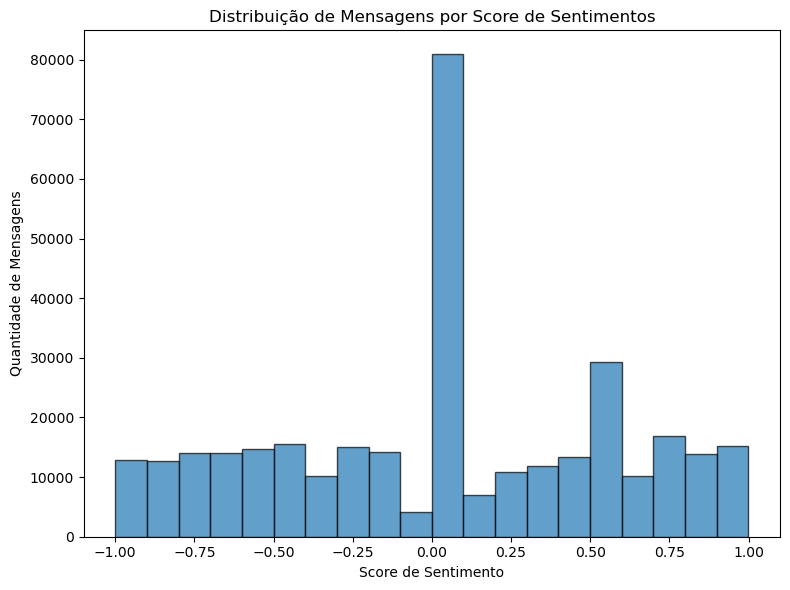

In [150]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(df['score_sentiment'], bins=20, edgecolor='black', alpha=0.7)

ax.set_title('Distribuição de Mensagens por Score de Sentimentos')
ax.set_xlabel('Score de Sentimento')
ax.set_ylabel('Quantidade de Mensagens',)

plt.tight_layout()
plt.show()


## 39. Proporção entre mensagens virais e não virais;

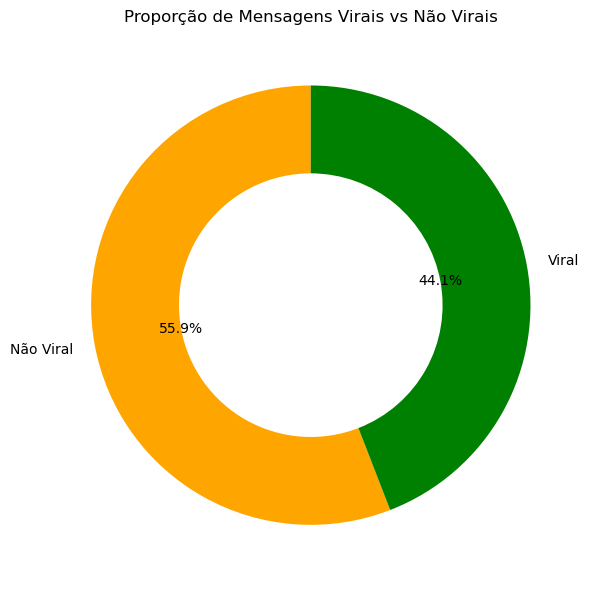

In [152]:
df['viral'] = df['text_content_anonymous'].duplicated(keep=False).astype(int)

df[['text_content_anonymous', 'viral']].head()

count_viral = df['viral'].value_counts()

fig, ax = plt.subplots(figsize=(6, 6))

labels = ['Não Viral', 'Viral']
values = count_viral.values

wedges, texts, autotexts = ax.pie(
    values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'green'], wedgeprops=dict(width=0.4)
)

ax.set_title('Proporção de Mensagens Virais vs Não Virais')
ax.axis('equal') 
plt.tight_layout()
plt.show()


## 40. Algo que você julga importante e que ainda não foi solicitado;

<Figure size 1000x600 with 0 Axes>

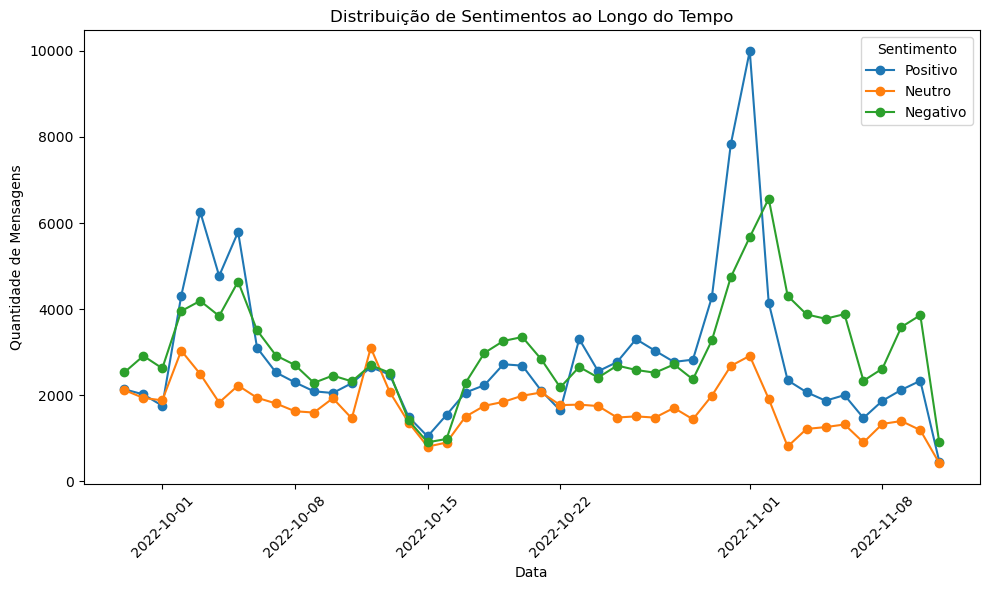

In [153]:
df['sentiment_category'] = df['score_sentiment'].apply(
    lambda x: 'positivo' if x > 0 else ('negativo' if x < 0 else 'neutro')
)

df['date'] = pd.to_datetime(df['date_message']).dt.date
df_grouped = df.groupby(['date', 'sentiment_category']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
df_grouped.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Distribuição de Sentimentos ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade de Mensagens')
plt.legend(title='Sentimento', labels=['Positivo', 'Neutro', 'Negativo'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
